In [1]:
# Project Title: Global Warming Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")


# Global Temprature

In [2]:
# reading global tempreture CSV file
df = pd.read_csv('global_temp.csv')

In [3]:
# Display basic information about the dataset
df.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1961,1961,?C,0.746,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1962,1962,?C,0.009,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1963,1963,?C,2.695,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1964,1964,?C,-5.277,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1965,1965,?C,1.827,Fc,Calculated data


In [4]:
df.columns

Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229925 entries, 0 to 229924
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       229925 non-null  object 
 1   Domain            229925 non-null  object 
 2   Area Code (FAO)   229925 non-null  int64  
 3   Area              229925 non-null  object 
 4   Element Code      229925 non-null  int64  
 5   Element           229925 non-null  object 
 6   Months Code       229925 non-null  int64  
 7   Months            229925 non-null  object 
 8   Year Code         229925 non-null  int64  
 9   Year              229925 non-null  int64  
 10  Unit              229925 non-null  object 
 11  Value             222012 non-null  float64
 12  Flag              229925 non-null  object 
 13  Flag Description  229925 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 24.6+ MB


In [6]:
# Check for missing values
df.isnull().sum()

Domain Code            0
Domain                 0
Area Code (FAO)        0
Area                   0
Element Code           0
Element                0
Months Code            0
Months                 0
Year Code              0
Year                   0
Unit                   0
Value               7913
Flag                   0
Flag Description       0
dtype: int64

In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

In [8]:
# Confirm that there are no missing values
df.isnull().sum()

Domain Code         0
Domain              0
Area Code (FAO)     0
Area                0
Element Code        0
Element             0
Months Code         0
Months              0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222012 entries, 0 to 229924
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       222012 non-null  object 
 1   Domain            222012 non-null  object 
 2   Area Code (FAO)   222012 non-null  int64  
 3   Area              222012 non-null  object 
 4   Element Code      222012 non-null  int64  
 5   Element           222012 non-null  object 
 6   Months Code       222012 non-null  int64  
 7   Months            222012 non-null  object 
 8   Year Code         222012 non-null  int64  
 9   Year              222012 non-null  int64  
 10  Unit              222012 non-null  object 
 11  Value             222012 non-null  float64
 12  Flag              222012 non-null  object 
 13  Flag Description  222012 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 25.4+ MB


In [10]:
# Drop unnecessary columns
df.drop(['Domain Code','Domain','Element Code','Element','Year Code','Flag Description'], axis=1 , inplace=True)

In [11]:
# Display updated information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222012 entries, 0 to 229924
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Area Code (FAO)  222012 non-null  int64  
 1   Area             222012 non-null  object 
 2   Months Code      222012 non-null  int64  
 3   Months           222012 non-null  object 
 4   Year             222012 non-null  int64  
 5   Unit             222012 non-null  object 
 6   Value            222012 non-null  float64
 7   Flag             222012 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 15.2+ MB


In [12]:
# Display descriptive statistics
df.describe()

,Area Code (FAO),Months Code,Year,Value
count,222012.000000,222012.000000,222012.000000,222012.000000
mean,130.067483,7009.883065,1991.142817,0.492626
std,76.816867,6.038440,17.318043,1.036364
min,1.000000,7001.000000,1961.000000,-9.303000
25%,64.000000,7005.000000,1976.000000,-0.071000
50%,129.000000,7009.000000,1992.000000,0.414000
75%,194.000000,7016.000000,2006.000000,0.999000
max,351.000000,7020.000000,2020.000000,11.759000


# Seasonal Patterns - Month-wise Analysis

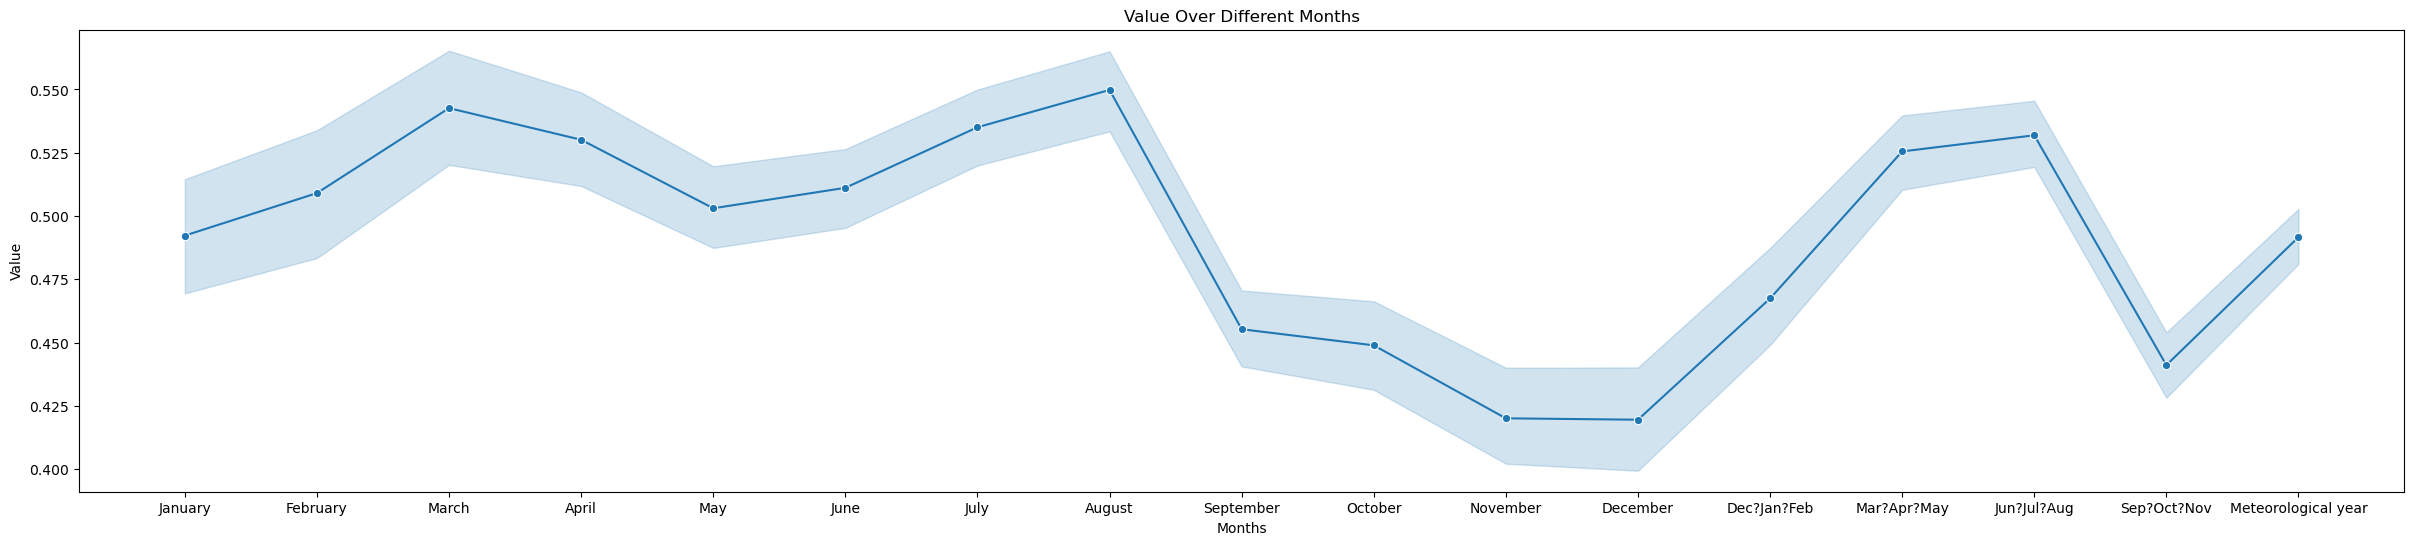

In [13]:
# Seasonal Patterns - Month-wise Analysis
# Creating a line plot to analyze seasonal patterns month-wise
plt.figure(figsize=(30, 6))
sns.lineplot(x='Months', y='Value', data=df, marker='o', linestyle='-')

# Title and labels for better understanding
plt.title('Value Over Different Months')
plt.xlabel('Months')
plt.ylabel('Value')

# Display the plot
plt.show()

# Correlation Analysis - Correlation Heatmap

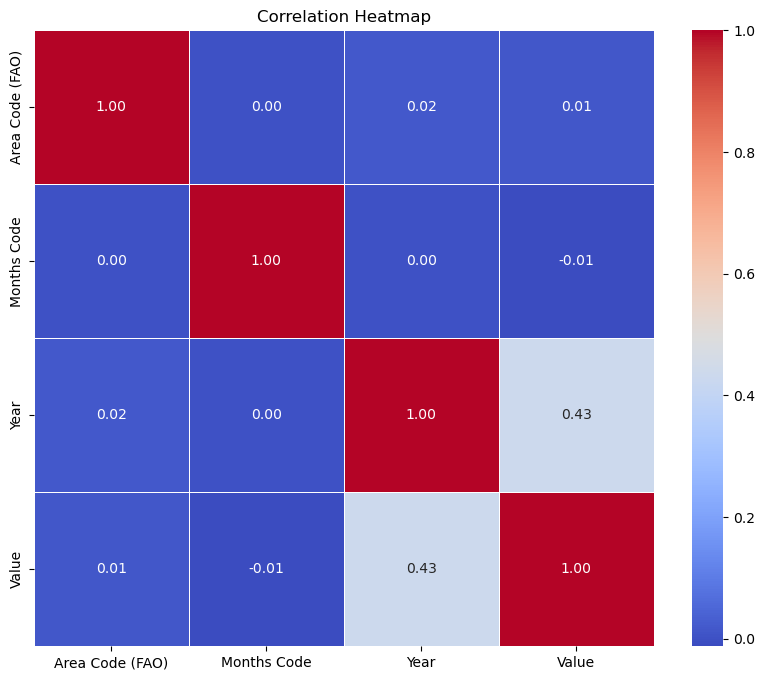

In [14]:
# Correlation Analysis - Correlation Heatmap
# Selecting numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Creating a correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plotting the heatmap for better visualization of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Title for the heatmap
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

# Outlier Detection - Box Plot

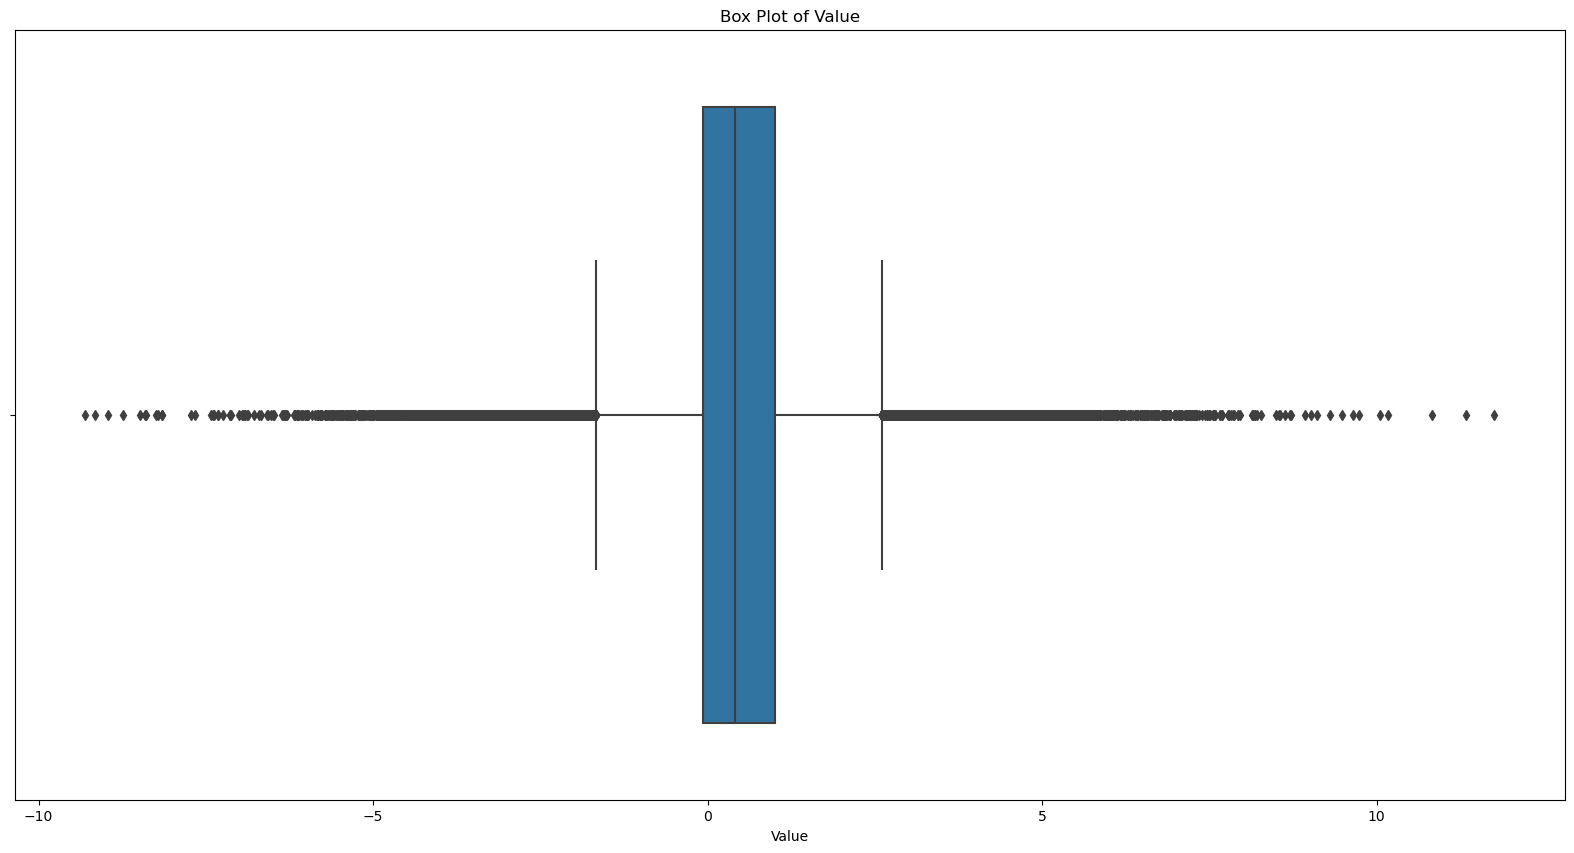

In [15]:
# Outlier Detection - Box Plot
plt.figure(figsize=(20, 10))

# Using Seaborn's boxplot to visualize the distribution and detect outliers
sns.boxplot(x=df['Value'])

# Title for the plot
plt.title('Box Plot of Value')

# Display the plot
plt.show()

# Temperature Trend Over Years (1960 - 2020)

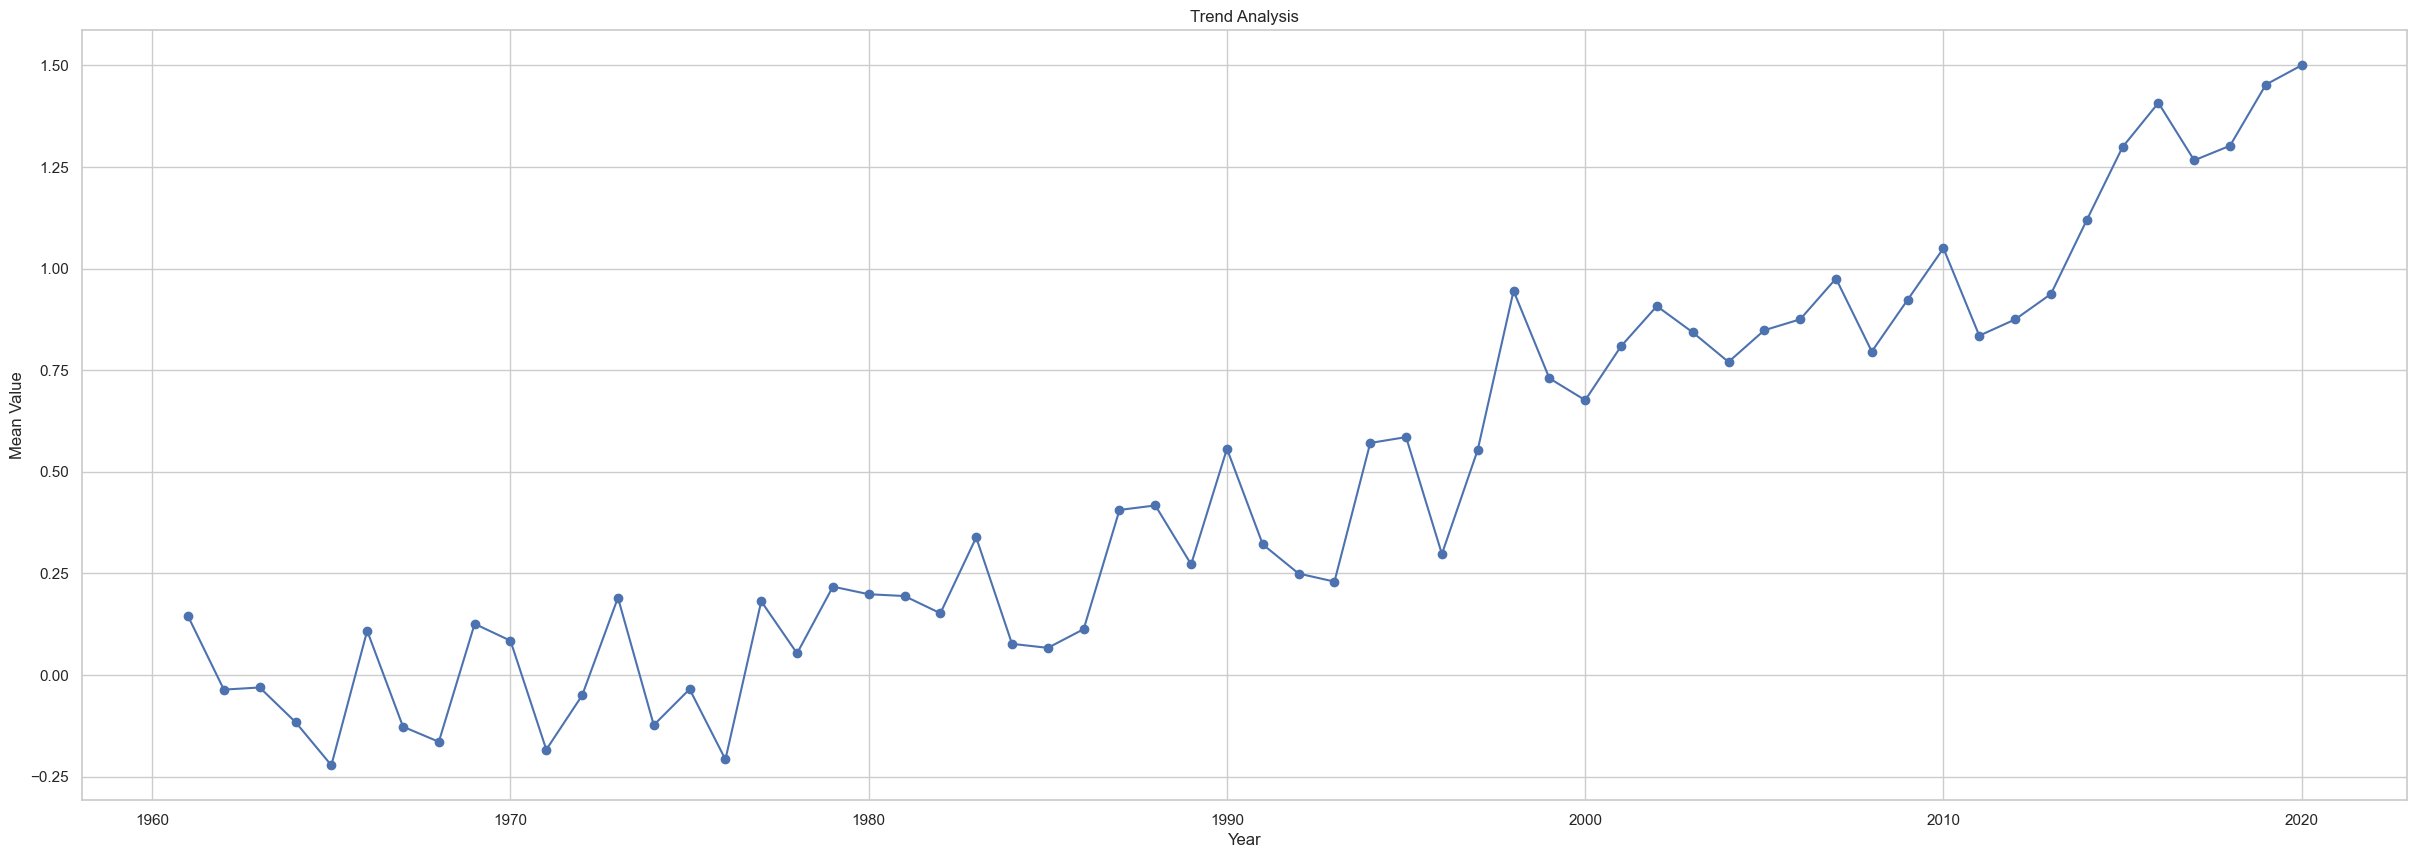

In [16]:
# Ensure 'Year' is in datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Set the background style to whitegrid
sns.set(style="whitegrid")

# Trend Analysis 
# temperature trends, attributing global warming to natural and human-induced factors
df_resampled = df.groupby(df['Year'].dt.year)['Value'].mean().reset_index()

# Plotting the Resampled Data
plt.figure(figsize=(30, 10))
plt.plot(df_resampled['Year'], df_resampled['Value'], marker='o', linestyle='-')
plt.title('Trend Analysis')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.show()

# Temperature Distribution Over Years (1960 - 2020)

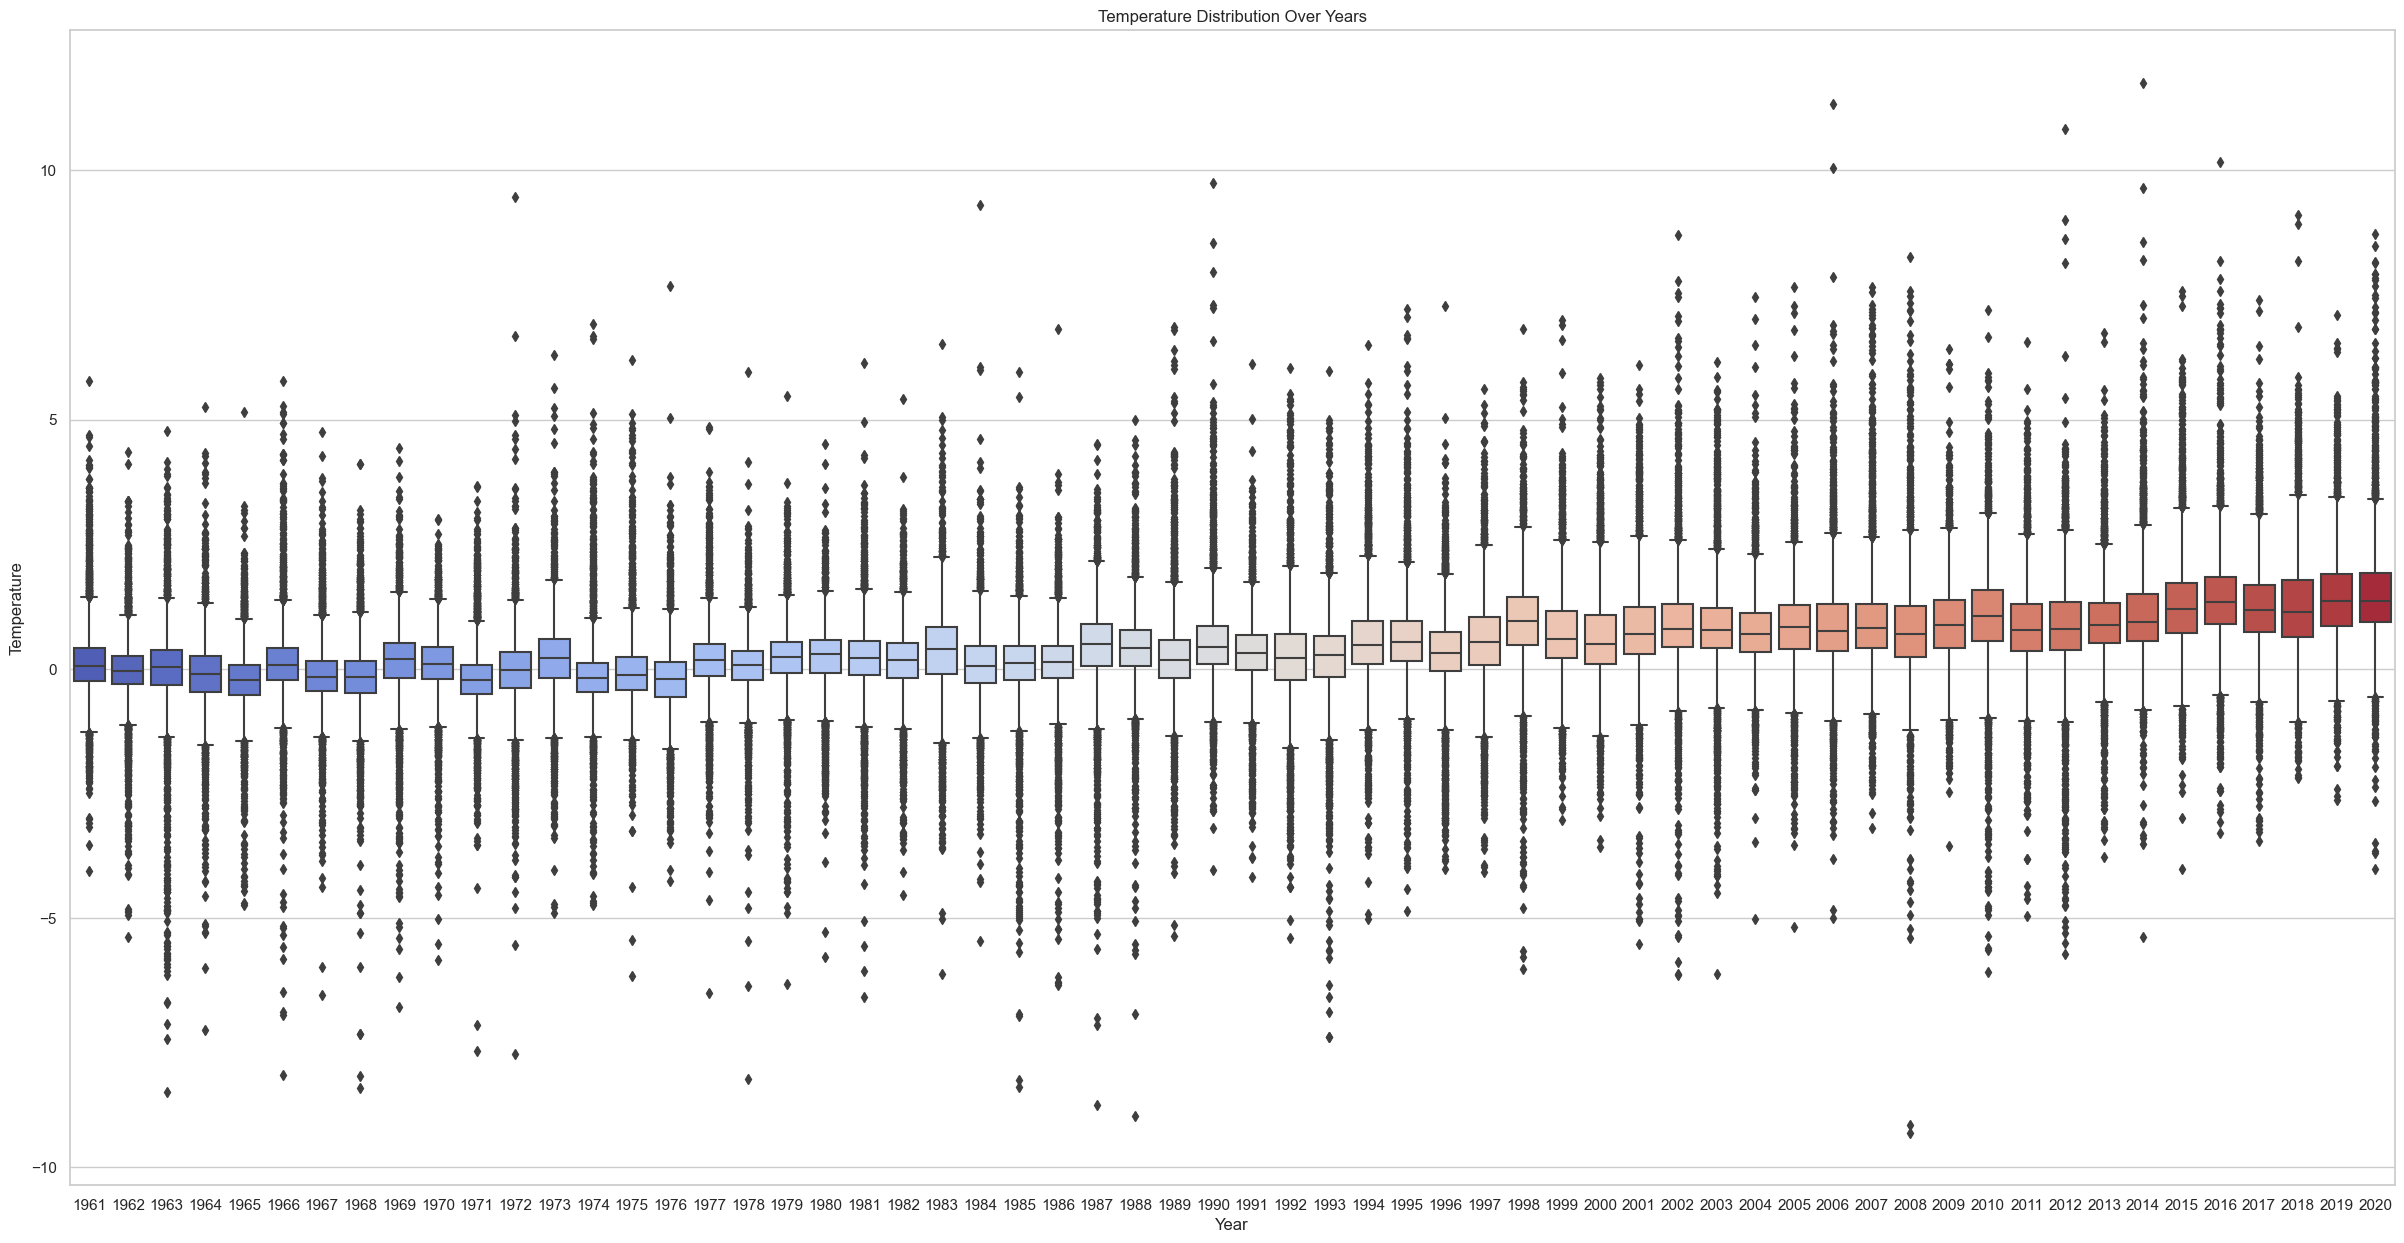

In [17]:
# Box plot to visualize the distribution of temperature values over years
plt.figure(figsize=(30, 15))

# Using Seaborn's boxplot to show the distribution
sns.boxplot(x=df['Year'].dt.year, y='Value', data=df, palette='coolwarm')

# Title and labels for better understanding
plt.title('Temperature Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Temperature')

# Display the plot
plt.show()

# global temperature Time Series Decomposition (1960 - 2020)

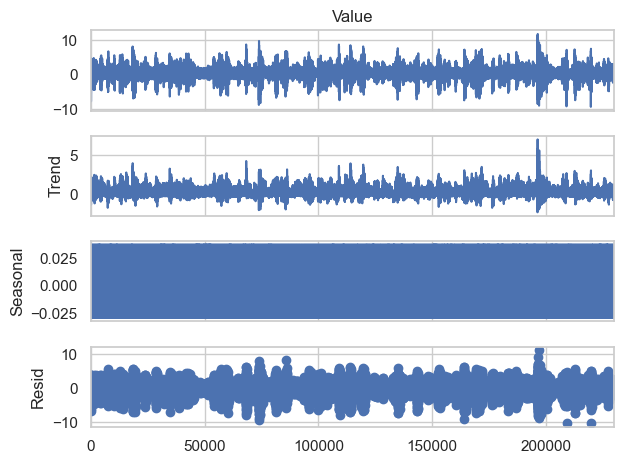

In [18]:
# Global Temperature Time Series Decomposition
# Importing the necessary library for time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Applying seasonal decomposition to the global temperature data
result = seasonal_decompose(df['Value'], model='additive', period=12)

# Plotting the decomposed components (trend, seasonal, and residual)
result.plot()

# Display the plot
plt.show()

# Sea Levels 

In [19]:
# Load the Global sea levels CSV file 
#Skip the first 82 row to clean the data and be comparable with the previous data set (1960 - 2020)
sea_levels_df = pd.read_csv('Global_sea_level_rise.csv', skiprows=range(1, 82))

In [20]:
sea_levels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    60 non-null     int64  
 1   date                    60 non-null     object 
 2   mmfrom1993-2008average  60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


In [21]:
# Display the first few rows of the Sea Levels dataset
sea_levels_df.head()

,year,date,mmfrom1993-2008average
0,1961,7/15/1961,-60.747396
1,1962,7/15/1962,-68.047396
2,1963,7/15/1963,-69.914062
3,1964,7/15/1964,-70.980729
4,1965,7/15/1965,-66.314063


In [22]:
# Descriptive Statistics
sea_levels_df.describe()

,year,mmfrom1993-2008average
count,60.000000,60.000000
mean,1990.500000,-14.317921
std,17.464249,41.048565
min,1961.000000,-72.814063
25%,1975.750000,-45.022396
50%,1990.500000,-22.530729
75%,2005.250000,13.894271
max,2020.000000,66.704325


In [23]:
sea_levels_df.isnull().sum()

year                      0
date                      0
mmfrom1993-2008average    0
dtype: int64

# Sea Levels over Time Visualization (1960 - 2020)

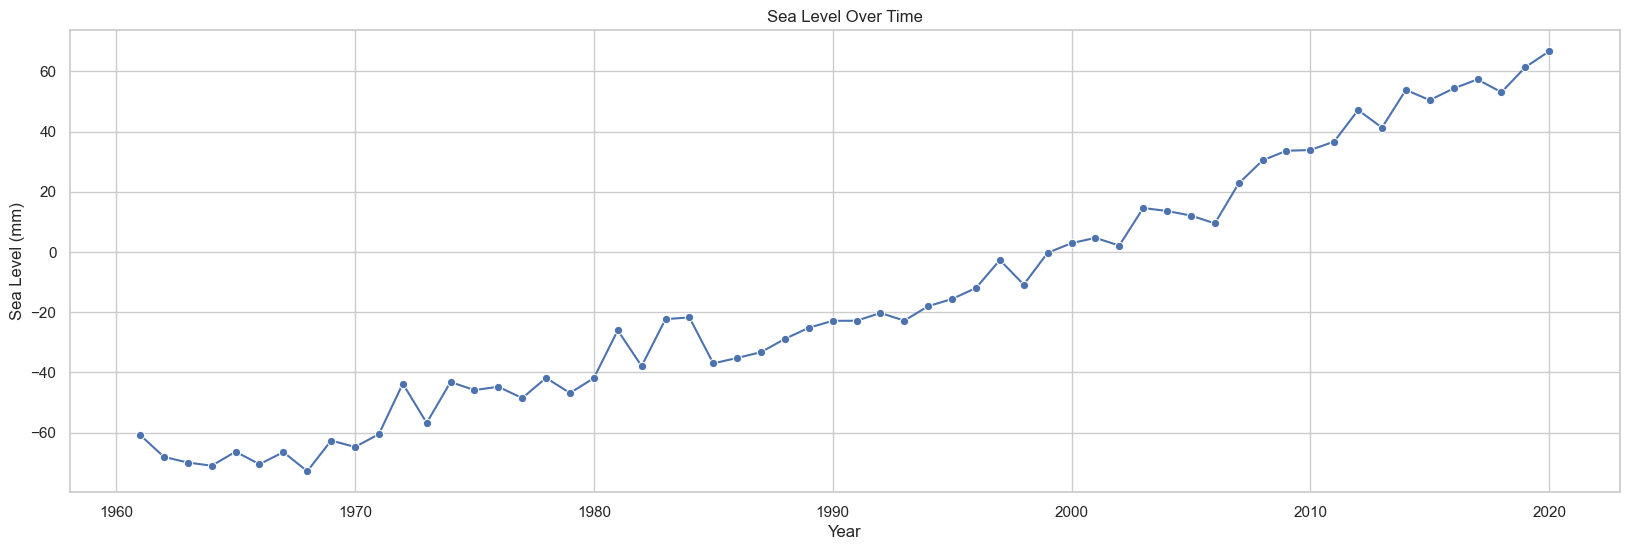

In [24]:
# Visualize Sea Levels over Time
# Creating a line plot to visualize sea levels over time
plt.figure(figsize=(20, 6))
sns.lineplot(x='year', y='mmfrom1993-2008average', data=sea_levels_df, marker='o', linestyle='-')

# Title and labels for better understanding
plt.title('Sea Level Over Time')
plt.xlabel('Year')
plt.ylabel('Sea Level (mm)')
# Display the plot
plt.show()

# the distribution of sea levels Visualization (1960 - 2020)

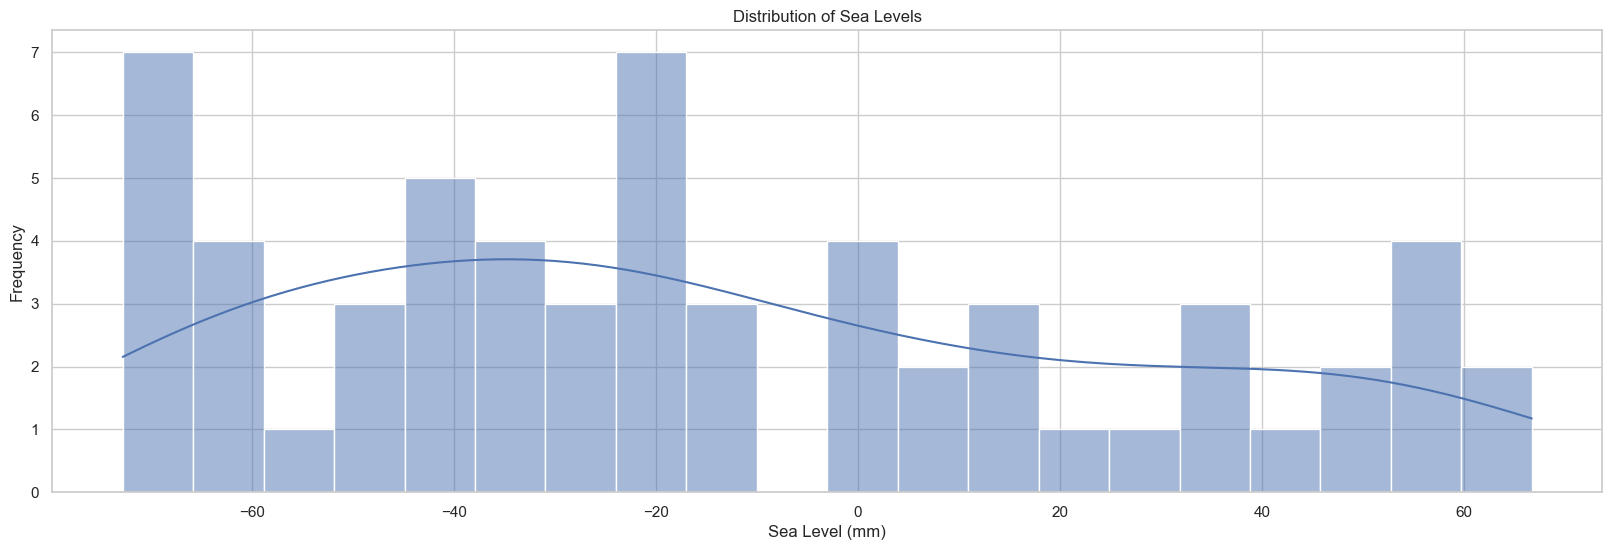

In [25]:
# Visualize the distribution of sea levels using a histogram

# Creating a histogram plot for the distribution of sea levels
plt.figure(figsize=(20, 6))
sns.histplot(sea_levels_df['mmfrom1993-2008average'], bins=20, kde=True)

# Title and labels for better understanding
plt.title('Distribution of Sea Levels')
plt.xlabel('Sea Level (mm)')
plt.ylabel('Frequency')

# Display the plot
plt.show()

# Sea Levels tempreture Time Series Decomposition (1960 - 2020)

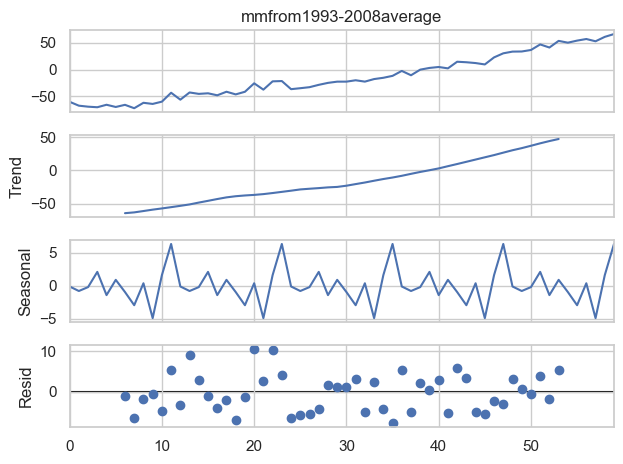

In [26]:
# Decompose sea level data into trend, seasonal, and residual components

# Importing the necessary library for time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Applying seasonal decomposition to sea level data
result = seasonal_decompose(sea_levels_df['mmfrom1993-2008average'], model='additive', period=12)

# Plotting the decomposed components (trend, seasonal, and residual)
result.plot()

# Display the plot
plt.show()


# the variation in sea levels visualization by year (1960 - 2020)

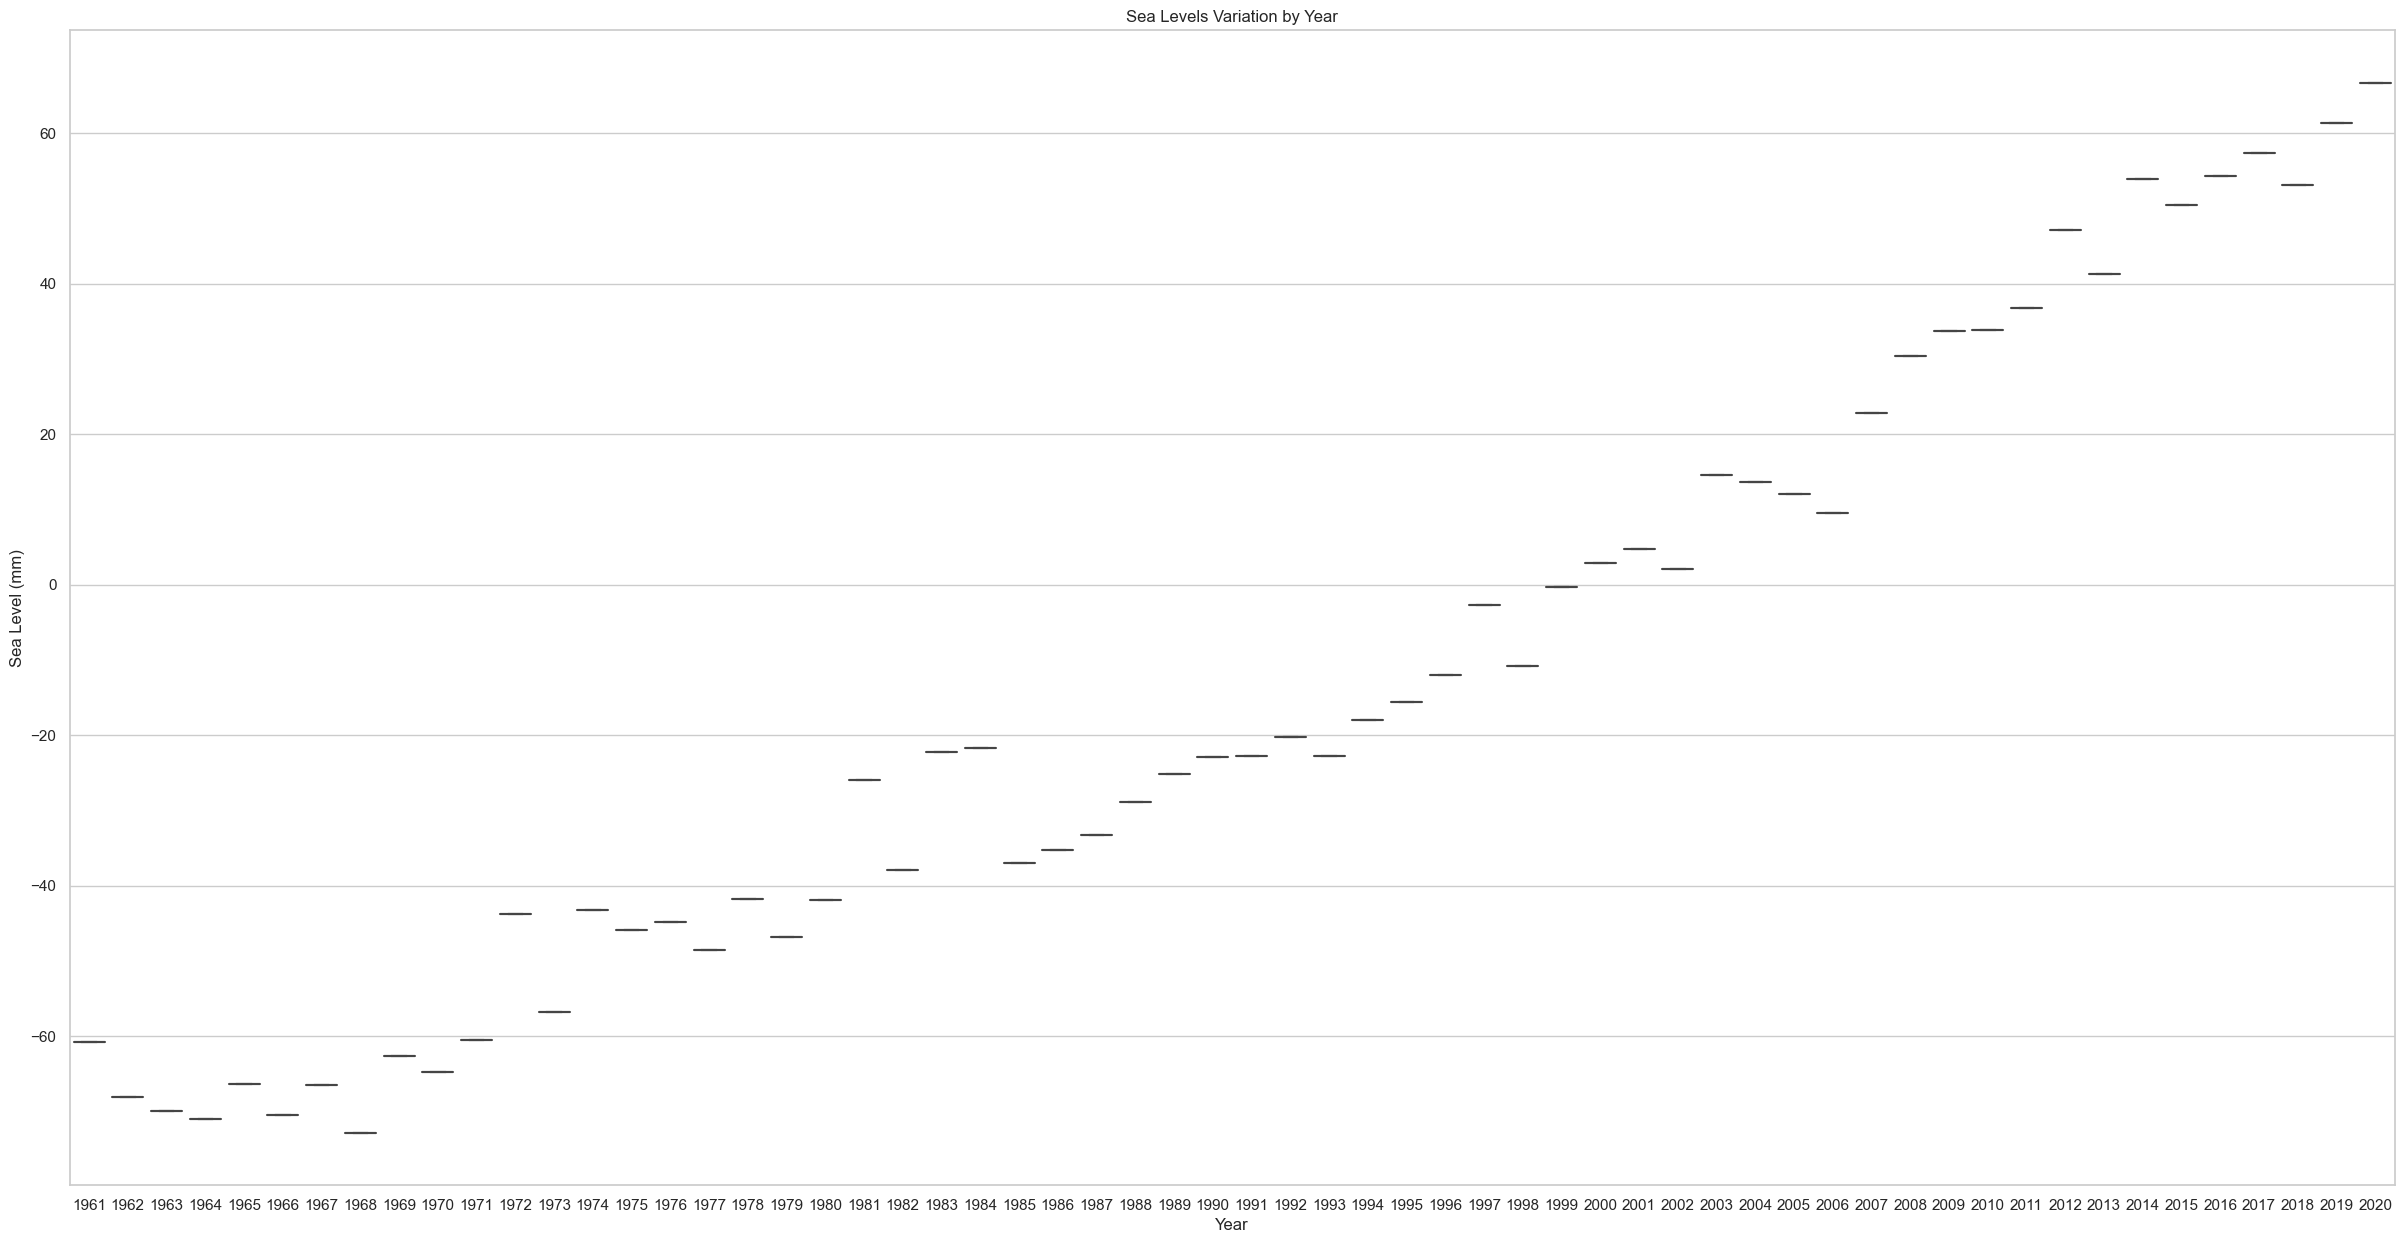

In [27]:
# Visualize the variation in sea levels using a box plot

# Creating a box plot to visualize the variation in sea levels by year
plt.figure(figsize=(30, 15))
sns.boxplot(x=sea_levels_df['year'], y=sea_levels_df['mmfrom1993-2008average'])

# Title and labels for better understanding
plt.title('Sea Levels Variation by Year')
plt.xlabel('Year')
plt.ylabel('Sea Level (mm)')

# Display the plot
plt.show()

# greenhouse gas emissions

In [28]:
# Load the CSV file for greenhouse gas emissions
ghg_df = pd.read_csv('emission_data.csv')

In [29]:
print(ghg_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Columns: 268 entries, Country to 2017
dtypes: float64(98), int64(169), object(1)
memory usage: 483.8+ KB
None


In [30]:
# Convert columns to numeric
ghg_df.columns = pd.to_numeric(ghg_df.columns, errors='coerce')

# Remove columns from 1751 to 1960 to make the dataset comparable with the other two datasets
ghg_df = ghg_df.drop(ghg_df.columns[:210], axis=1)

In [31]:
ghg_df.head()

,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
0,2.253063e+06,2.743861e+06,3.432455e+06,4.139191e+06,4.977742e+06,5.984658e+06,7.075817e+06,8.357682e+06,9.581072e+06,1.052230e+07,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
1,3.039232e+09,3.201227e+09,3.367562e+09,3.543896e+09,3.737535e+09,3.951170e+09,4.172252e+09,4.409297e+09,4.666579e+09,4.944495e+09,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
2,1.683242e+07,1.911142e+07,2.157363e+07,2.365478e+07,2.566998e+07,2.784274e+07,3.039288e+07,3.307126e+07,3.614170e+07,3.938434e+07,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
3,5.944026e+07,6.549618e+07,7.115718e+07,7.657634e+07,8.221938e+07,8.880792e+07,9.722878e+07,1.056604e+08,1.147106e+08,1.259736e+08,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
4,1.311077e+10,1.361011e+10,1.414134e+10,1.467653e+10,1.526400e+10,1.587641e+10,1.651347e+10,1.720244e+10,1.793879e+10,1.871654e+10,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10


In [32]:
ghg_df.describe()

,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
count,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,...,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02
mean,3.306647e+09,3.411185e+09,3.517366e+09,3.630522e+09,3.755060e+09,3.886479e+09,4.015902e+09,4.156091e+09,4.299685e+09,4.456102e+09,...,1.398744e+10,1.431951e+10,1.469829e+10,1.504459e+10,1.543729e+10,1.578588e+10,1.617543e+10,1.653158e+10,1.691931e+10,1.732373e+10
std,2.335865e+10,2.401472e+10,2.470655e+10,2.542208e+10,2.621760e+10,2.707073e+10,2.790425e+10,2.878122e+10,2.969597e+10,3.069147e+10,...,8.981685e+10,9.188034e+10,9.454156e+10,9.661454e+10,9.929591e+10,1.013842e+11,1.040596e+11,1.061600e+11,1.088358e+11,1.115423e+11
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.850320e+05,2.857920e+05,3.554080e+05,4.250240e+05,4.798800e+05,5.679200e+05,6.833360e+05,8.592080e+05,9.874480e+05,1.154160e+06,...,2.493352e+07,2.574326e+07,2.644592e+07,2.710177e+07,2.768984e+07,2.862802e+07,2.976871e+07,3.105887e+07,3.268508e+07,3.421887e+07
50%,5.078304e+06,6.342320e+06,7.868816e+06,9.086720e+06,1.018592e+07,1.141702e+07,1.292659e+07,1.780217e+07,1.982038e+07,2.248896e+07,...,2.045568e+08,2.129394e+08,2.209573e+08,2.300825e+08,2.416023e+08,2.507415e+08,2.563229e+08,2.621147e+08,2.680755e+08,2.737319e+08
75%,1.056407e+08,1.220426e+08,1.398081e+08,1.578473e+08,1.679687e+08,1.876604e+08,2.145835e+08,2.474083e+08,2.680253e+08,2.985622e+08,...,2.394520e+09,2.449266e+09,2.506229e+09,2.563067e+09,2.620797e+09,2.677380e+09,2.713781e+09,2.776195e+09,2.855434e+09,2.987929e+09
max,3.070000e+11,3.160000e+11,3.260000e+11,3.360000e+11,3.470000e+11,3.590000e+11,3.710000e+11,3.830000e+11,3.960000e+11,4.100000e+11,...,1.260000e+12,1.290000e+12,1.330000e+12,1.360000e+12,1.400000e+12,1.430000e+12,1.470000e+12,1.500000e+12,1.540000e+12,1.580000e+12


In [33]:
print(ghg_df.columns)

Index([1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0,
       1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0,
       1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0,
       1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0,
       1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0,
       2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0,
       2014.0, 2015.0, 2016.0, 2017.0],
      dtype='float64')


# visualize the GHG emissions by country and year using a heatmap (1960- 2017)

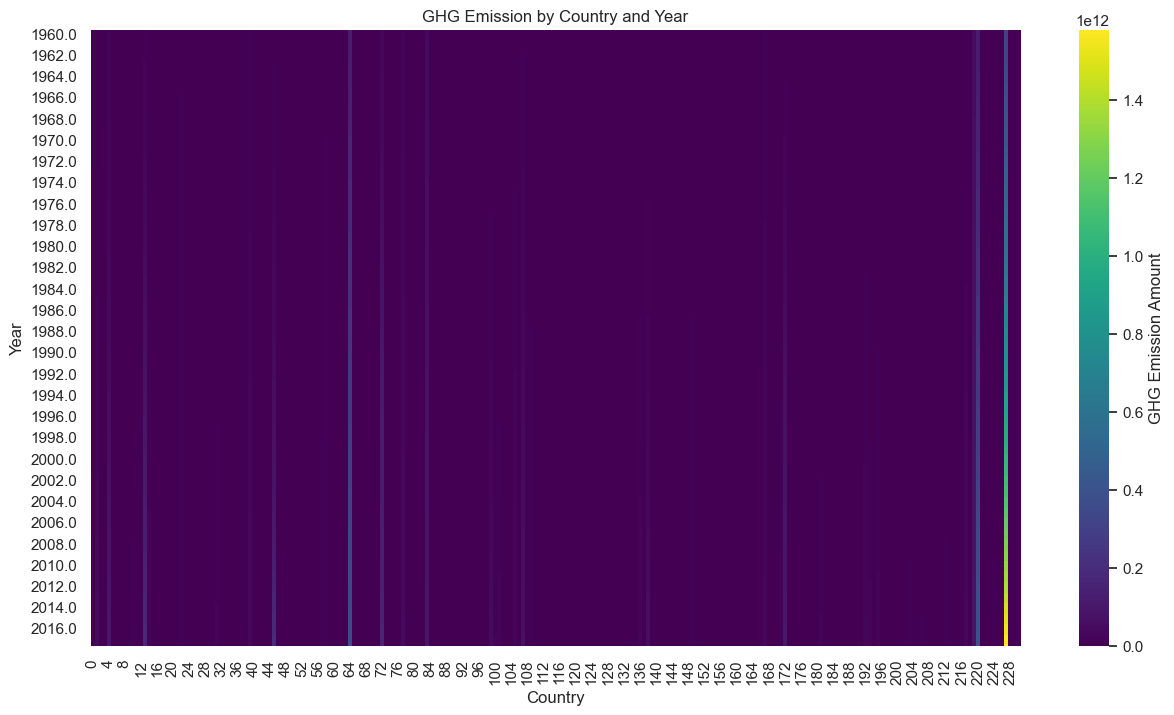

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns (excluding 'Country')
numeric_columns = ghg_df.select_dtypes(include='number').columns

# Transpose the DataFrame so that countries are rows and years are columns
ghg_df_transposed = ghg_df[numeric_columns].T

# Plotting with 'viridis' colormap
plt.figure(figsize=(15, 8))
sns.heatmap(ghg_df_transposed, cmap='viridis', cbar_kws={'label': 'GHG Emission Amount'})

# Title and labels for better understanding
plt.title('GHG Emission by Country and Year')
plt.xlabel('Country')
plt.ylabel('Year')

# Display the plot
plt.show()


# Total Greenhouse Gas Emissions Over Years (1960 - 2017)

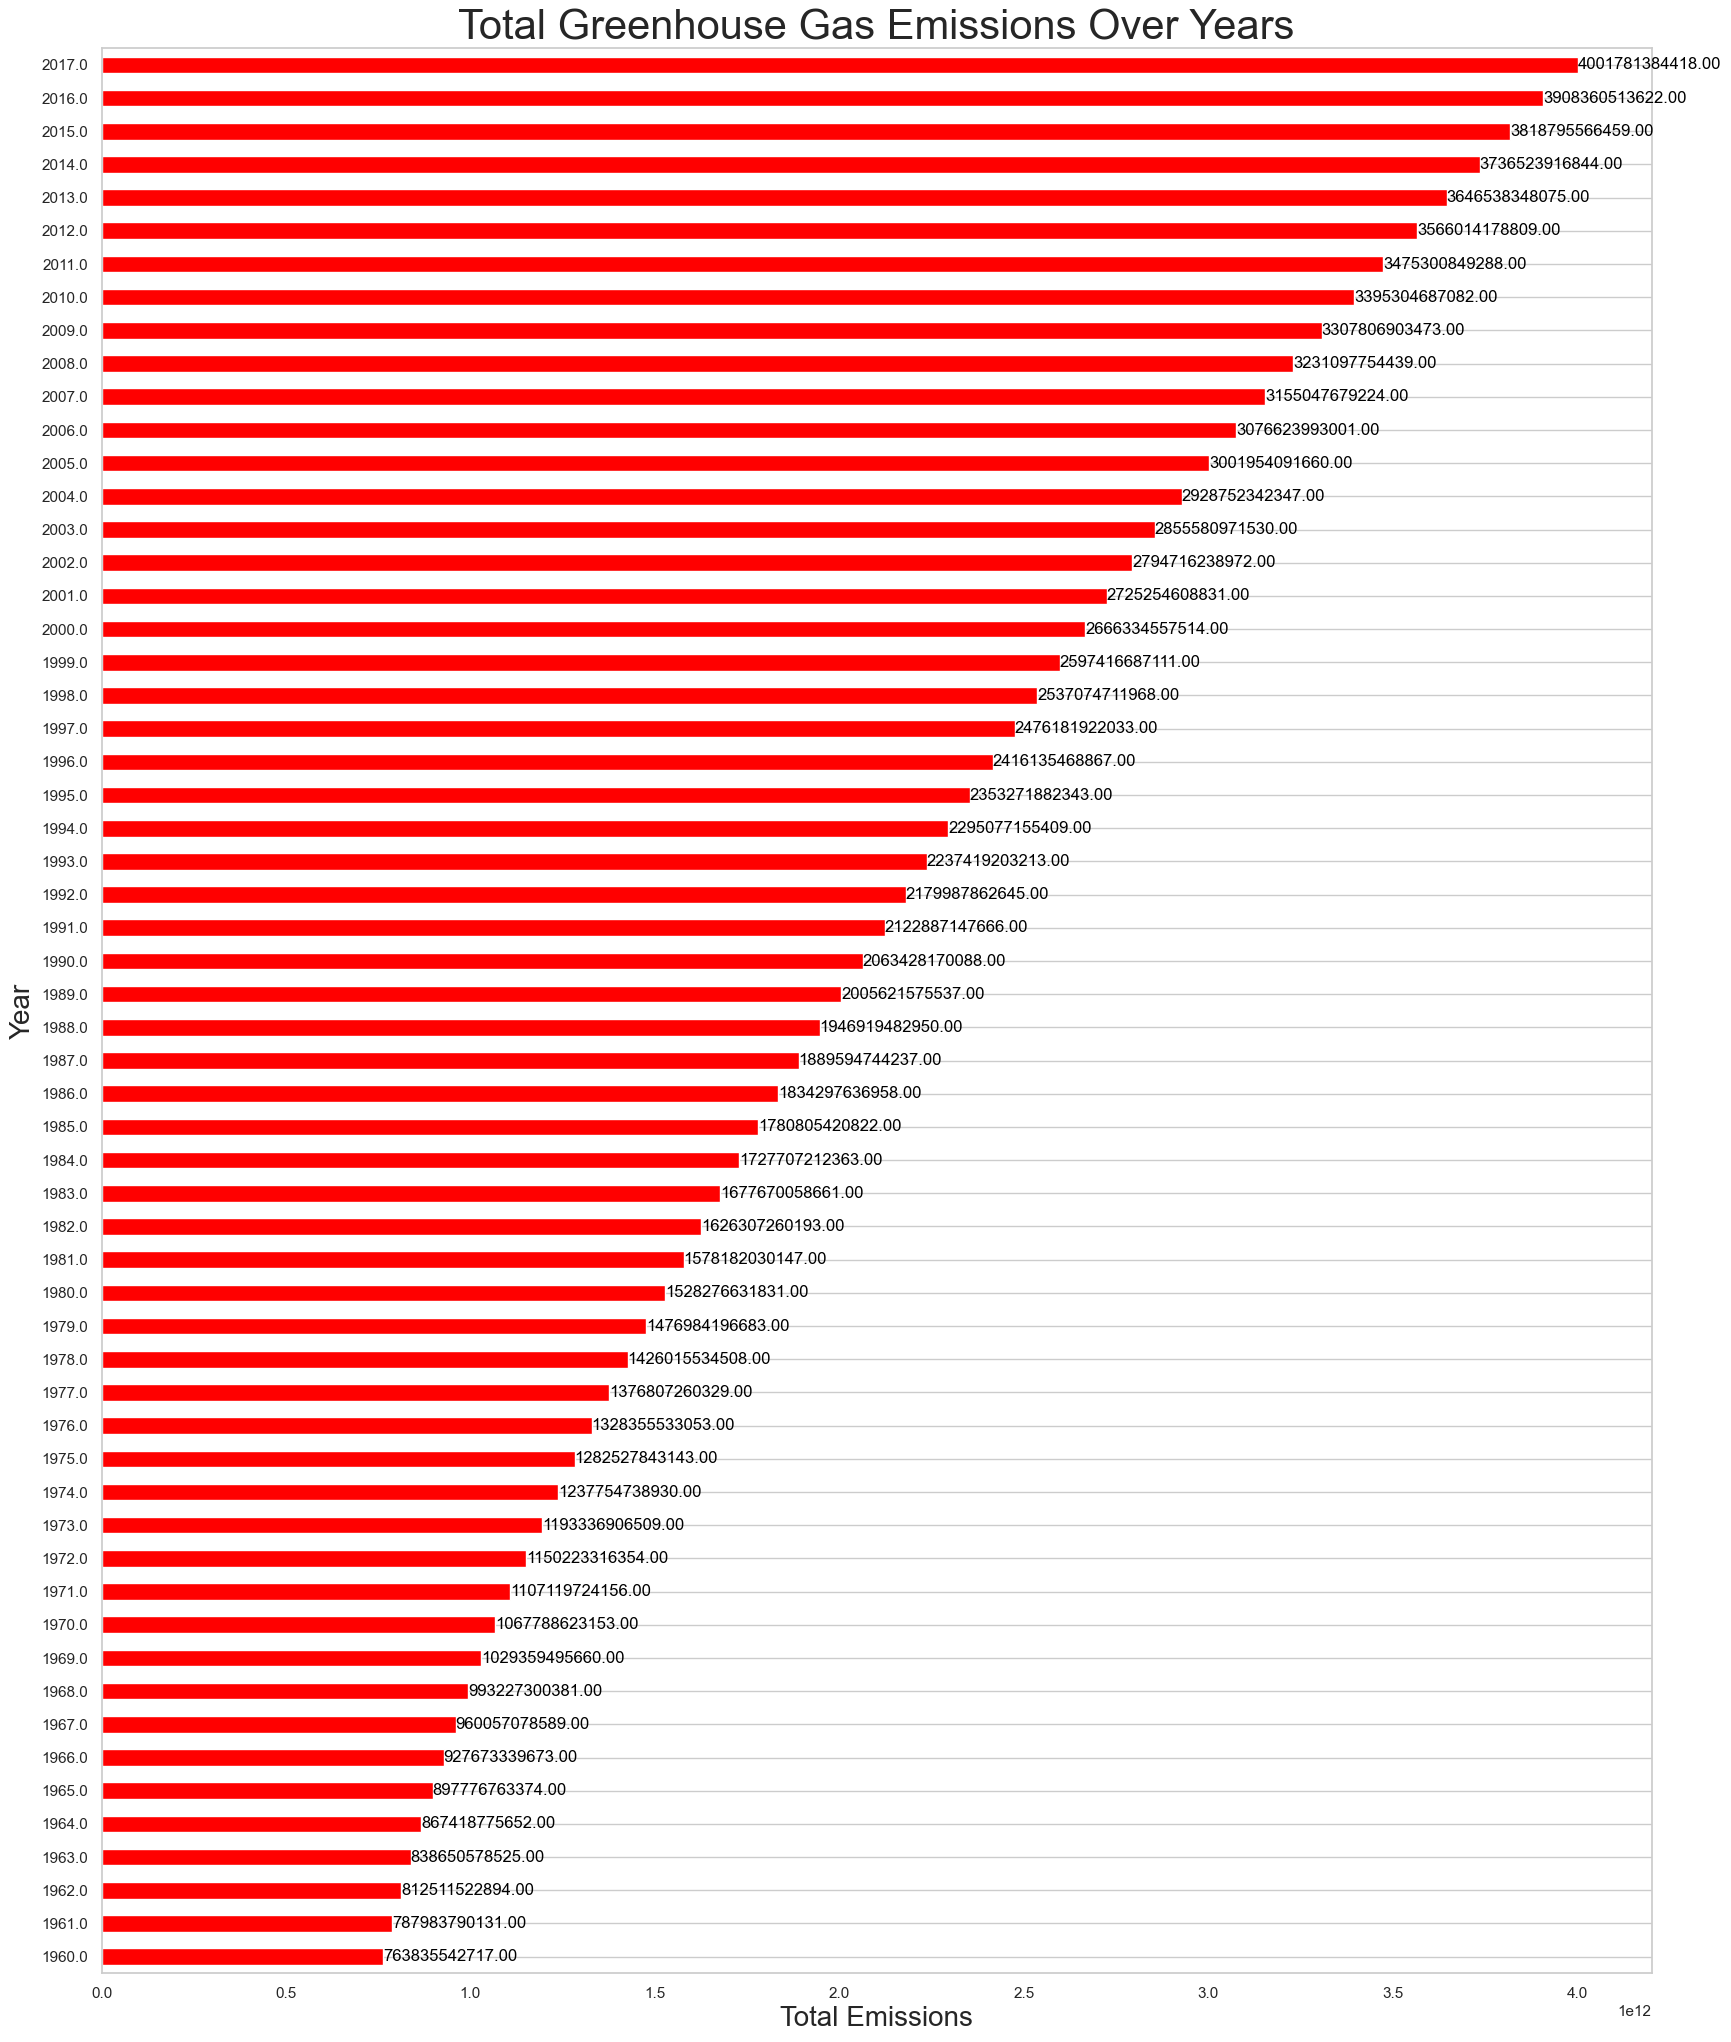

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the data to numeric (in case it's not already)
ghg_df_numeric = ghg_df.apply(pd.to_numeric, errors='coerce')

# Sum the emissions across all countries for each year
total_emissions = ghg_df_numeric.sum(axis=0)

# Plotting
plt.figure(figsize=(20, 25))
total_emissions.plot(kind='barh', color='red')

# Adding values on top of the bars
for i, value in enumerate(total_emissions):
    plt.text(value, i, f'{value:.2f}', va='center', fontsize=12, color='black')

# Title and labels for better understanding
plt.title('Total Greenhouse Gas Emissions Over Years', fontsize=30)
plt.xlabel('Total Emissions', fontsize=20)
plt.ylabel('Year', fontsize=20)
plt.grid(axis='x')  

# Display the plot
plt.show()


# box plot to visualize the distribution of greenhouse gas emissions by year (1960 - 2017)

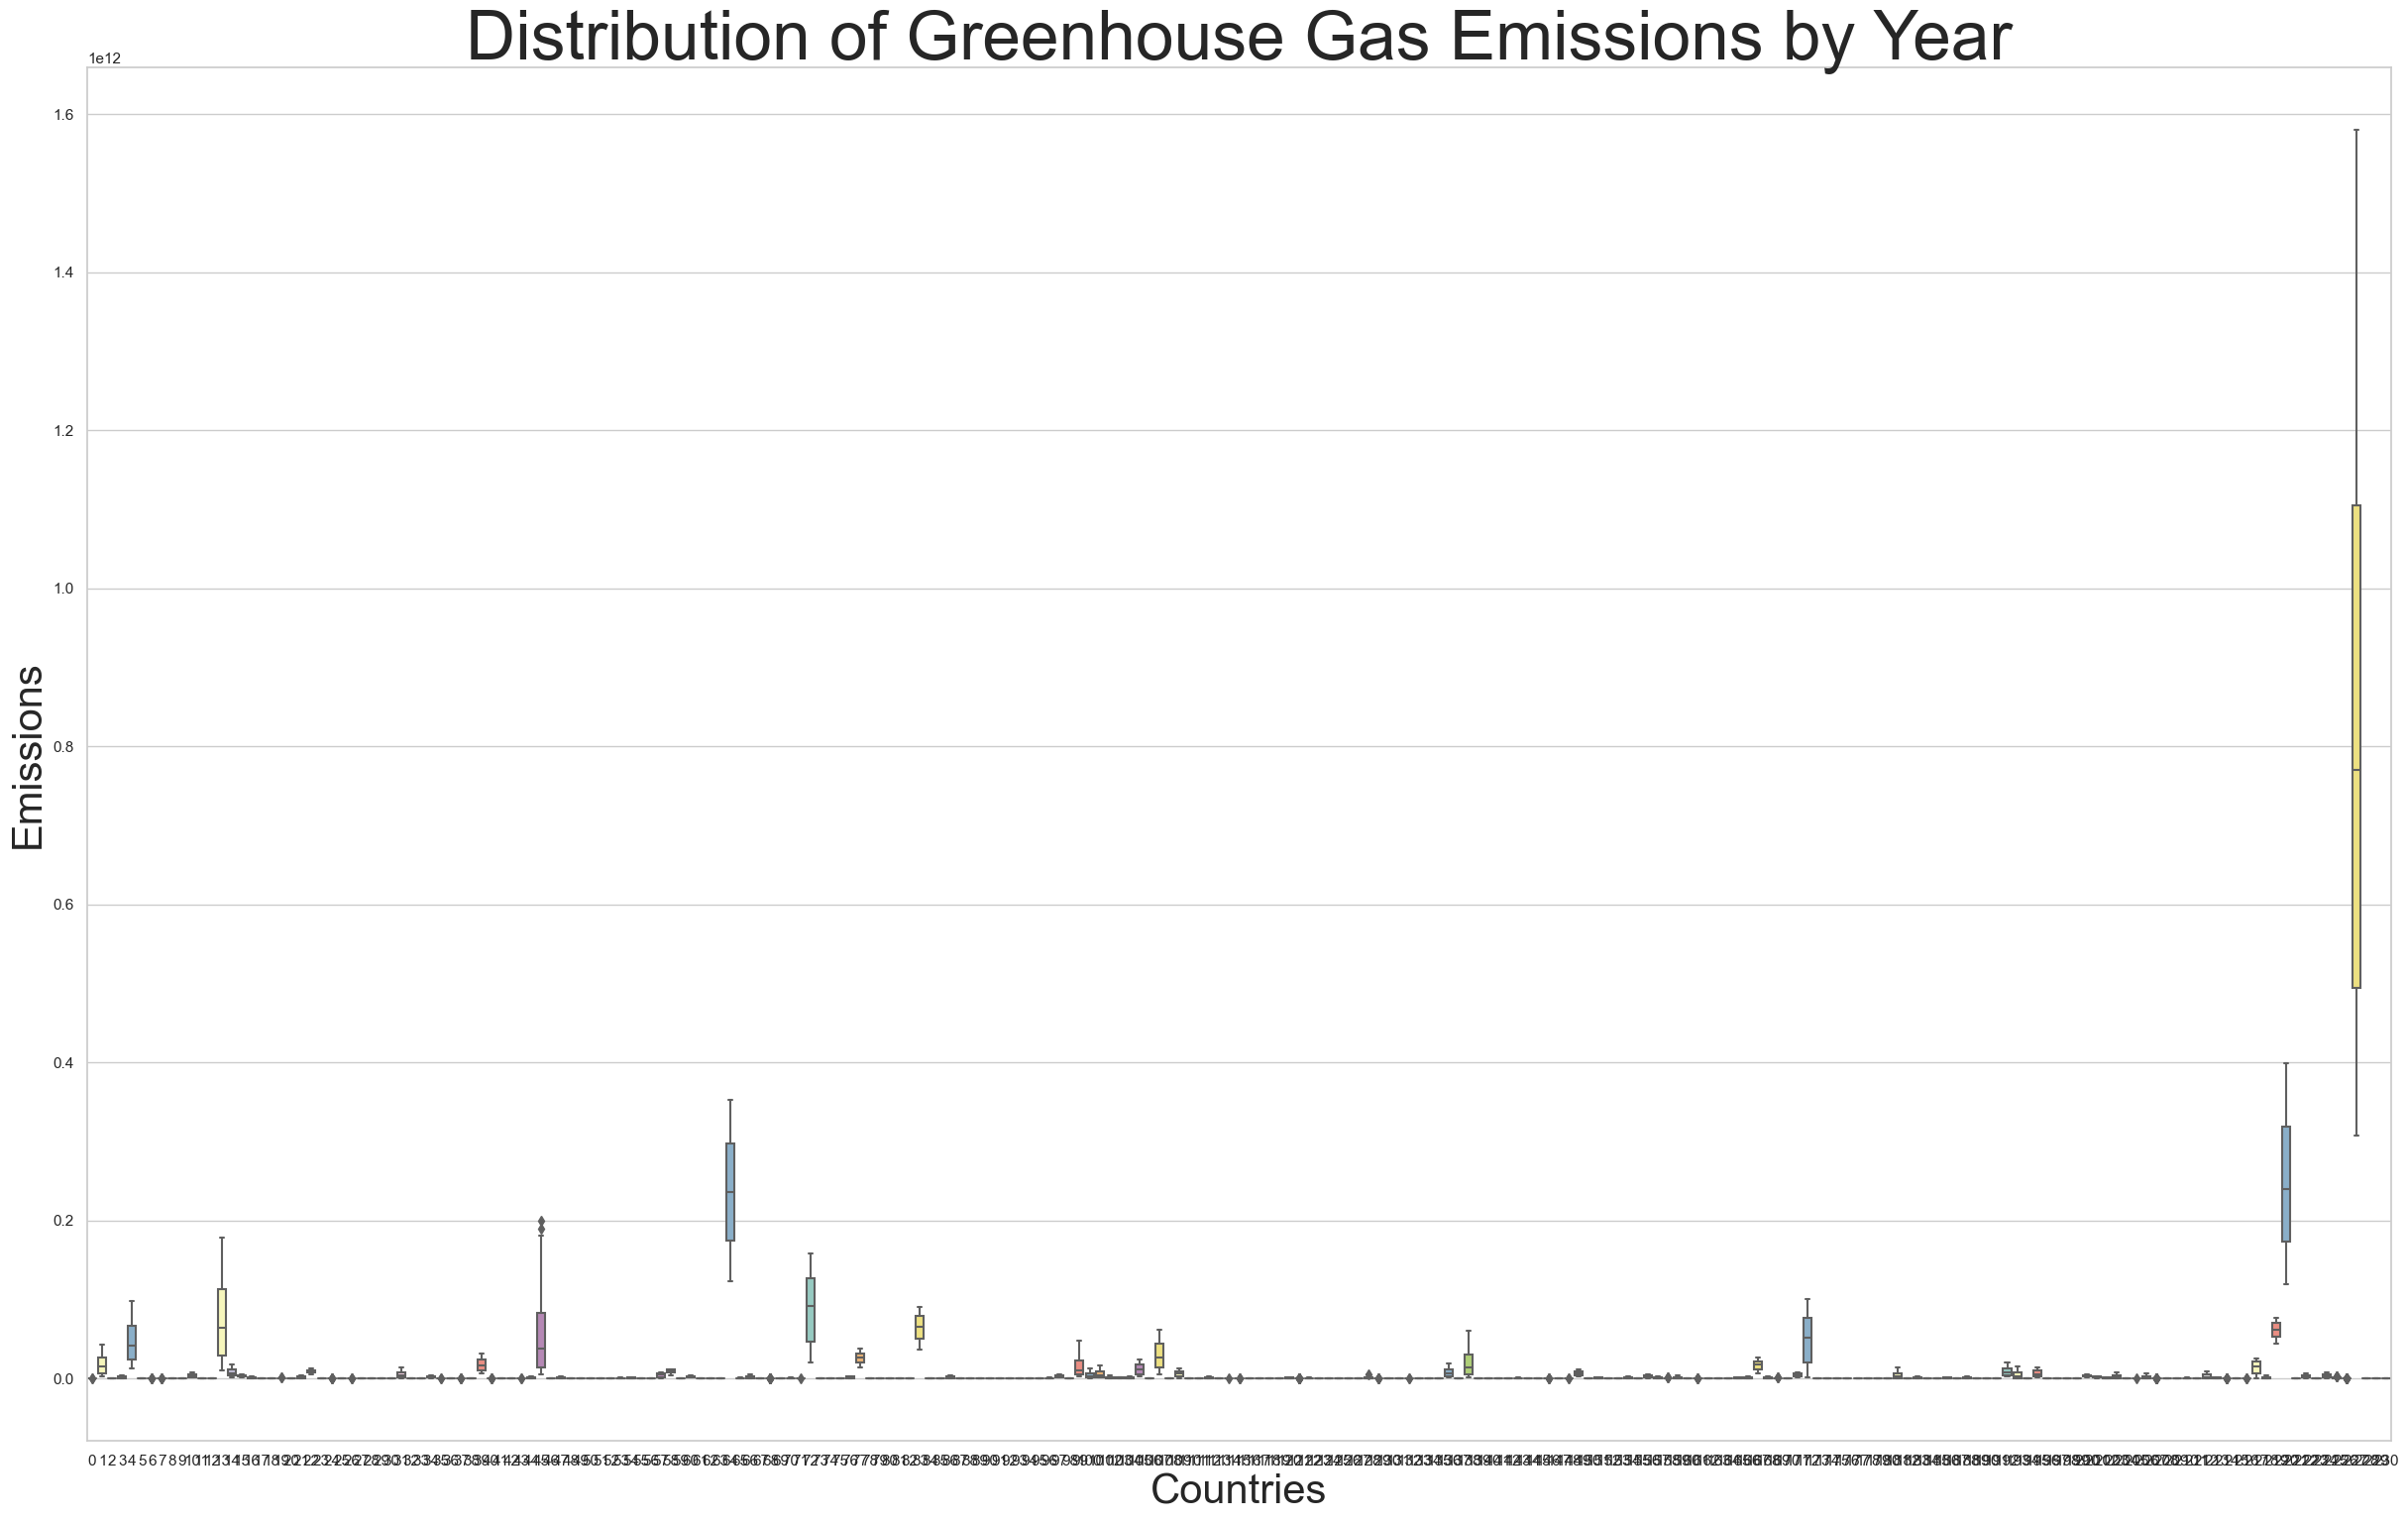

In [36]:
# Box Plot for the distribution of greenhouse gas emissions by year

# Creating a box plot to visualize the distribution
plt.figure(figsize=(30, 18))
sns.boxplot(data=ghg_df_transposed, palette='Set3')

# Title and labels for better understanding
plt.title('Distribution of Greenhouse Gas Emissions by Year', fontsize=50)
plt.xlabel('Countries', fontsize=30)
plt.ylabel('Emissions', fontsize=30)

# Display the plot
plt.show()


# line plot to visualize the greenhouse gas emissions over the years for The World.(1960 - 2017)

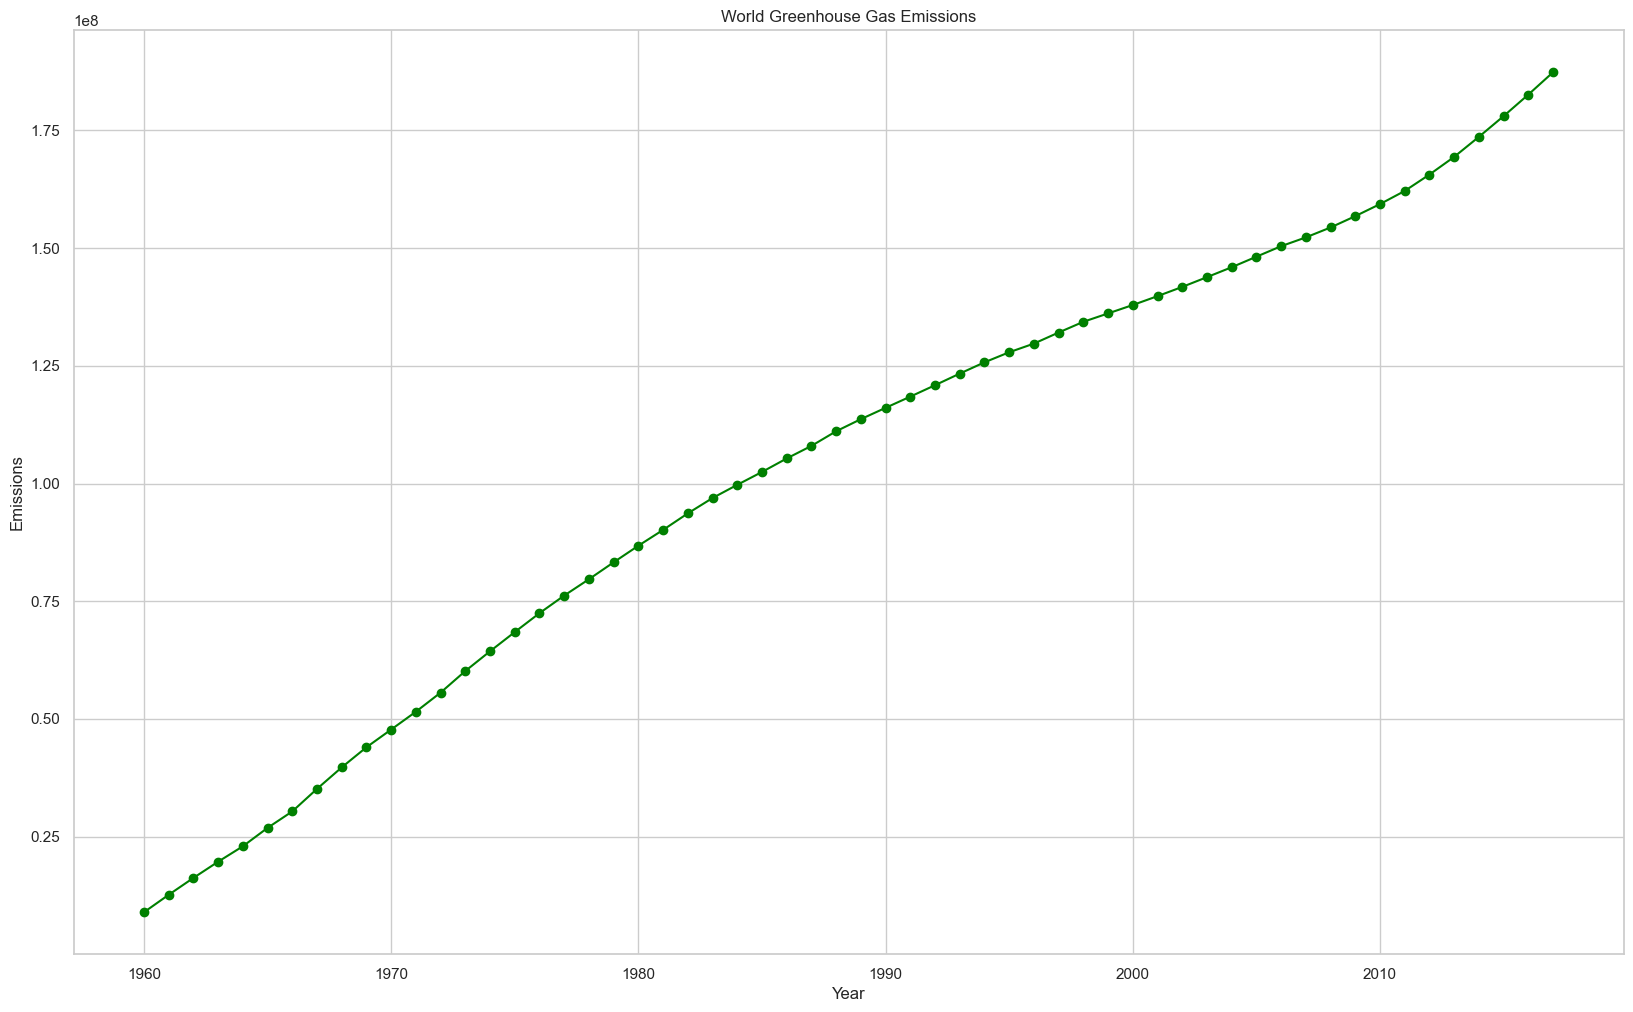

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named ghg_df
# Convert the data to numeric (in case it's not already)
ghg_df_numeric = ghg_df.apply(pd.to_numeric, errors='coerce')

# Choose a country of interest by index (World in this case)
country_index_of_interest = 229

# Extract emissions data for the selected country
emissions_for_country = ghg_df_numeric.iloc[country_index_of_interest]

# Filter out NaN values
valid_years = emissions_for_country.index[~np.isnan(emissions_for_country)]

# Specify major years to display (every 10th year in this example)
major_years = valid_years[::10]

# Plotting
plt.figure(figsize=(20, 12))
emissions_for_country.plot(kind='line', marker='o', color='green')

# Title and labels for better understanding
plt.title('World Greenhouse Gas Emissions')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.xticks(major_years)  # Set the x-axis ticks to major_years
plt.grid(True)

# Display the plot
plt.show()


# line plot to visualize greenhouse gas emissions over the years for several major countries.(1960 - 2017)

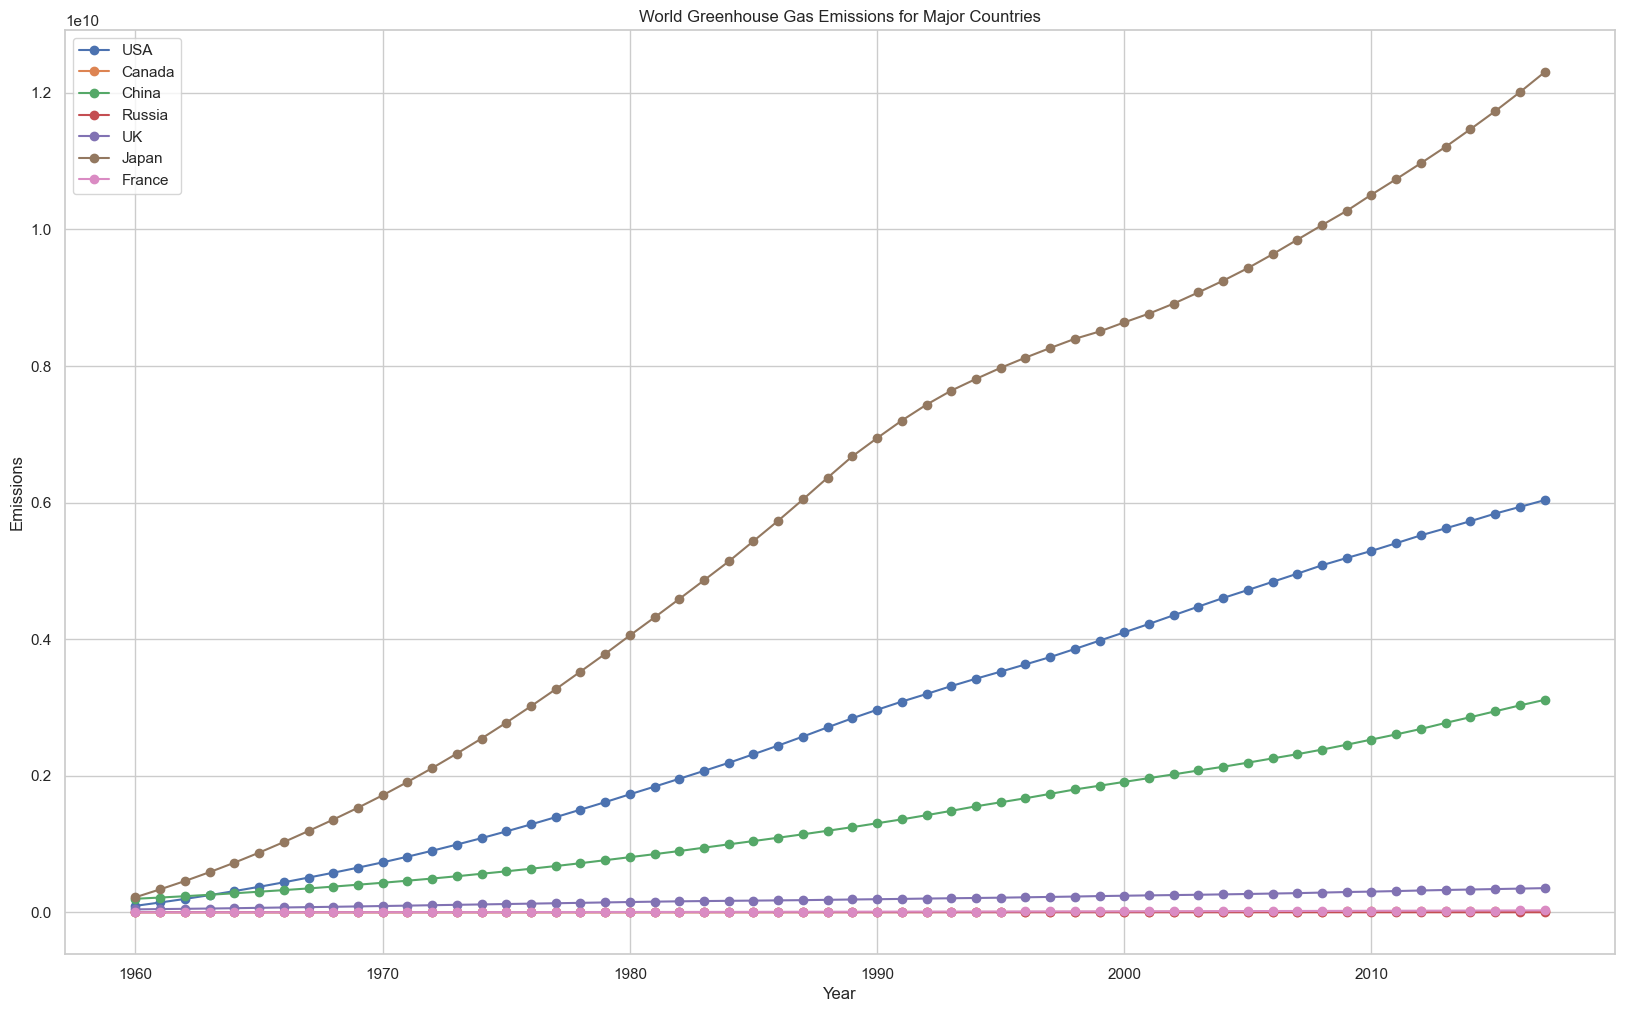

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the data to numeric (in case it's not already)
ghg_df_numeric = ghg_df.apply(pd.to_numeric, errors='coerce')

# Specify major countries and their corresponding indices
major_countries = {
    'USA': 222,
    'Canada': 41,
    'China': 47,
    'Russia': 174,
    'UK': 221,
    'Japan': 109,
    'France': 79
}

# Plotting
plt.figure(figsize=(20, 12))
for country, index in major_countries.items():
    emissions_for_country = ghg_df_numeric.iloc[index]
    # Filter out NaN values
    valid_years = emissions_for_country.index[~np.isnan(emissions_for_country)]
    # Specify major years to display (every 10th year in this example)
    major_years = valid_years[::10]
    # Plot the emissions for the current country
    plt.plot(emissions_for_country, marker='o', label=country)

# Title, labels, and legend for better understanding
plt.title('World Greenhouse Gas Emissions for Major Countries')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.xticks(major_years)  # Set the x-axis ticks to major_years
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


# Machine learning Implementation to forecast the Next 10 Years Using Polynomial Regression

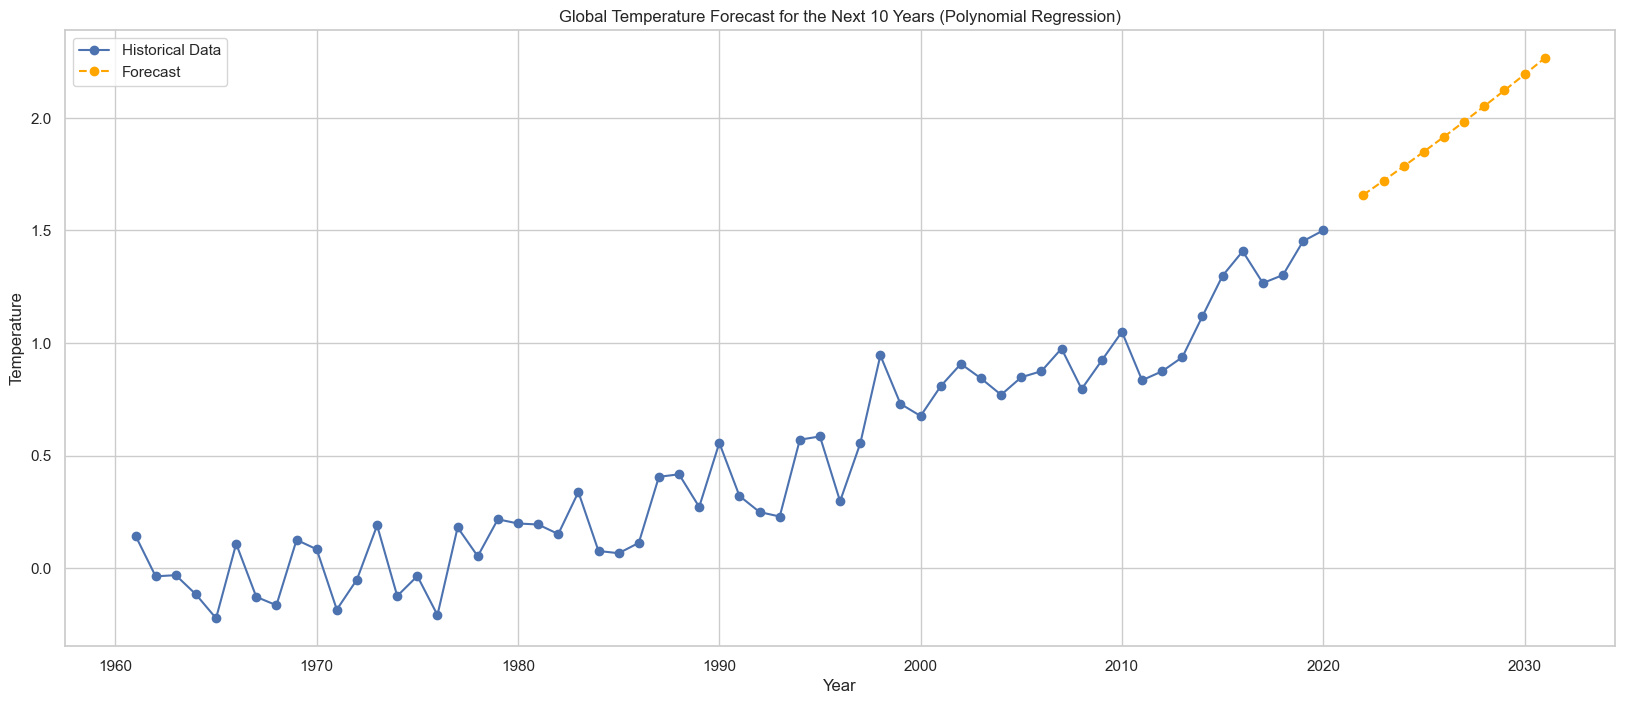

In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the global temperature dataset
df = pd.read_csv('global_temp.csv')

# Ensure 'Year' is in datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Aggregate or average duplicate entries for each year
df_agg = df.groupby('Year')['Value'].mean().reset_index()

# Polynomial regression
degree = 2  
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(df_agg['Year'].values.reshape(-1, 1))
model = LinearRegression()
model.fit(X_poly, df_agg['Value'])

# Forecast the next 10 years
future_years = pd.date_range(start=df_agg['Year'].max(), periods=10 + 1, freq='Y')[1:]
X_future_poly = poly_features.transform(future_years.values.reshape(-1, 1))
forecast = model.predict(X_future_poly)

# Plotting the historical data and the forecast
plt.figure(figsize=(20, 8))
plt.plot(df_agg['Year'], df_agg['Value'], label='Historical Data', marker='o')
plt.plot(future_years, forecast, label='Forecast', linestyle='--', marker='o', color='orange')
plt.title('Global Temperature Forecast for the Next 10 Years (Polynomial Regression)')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()


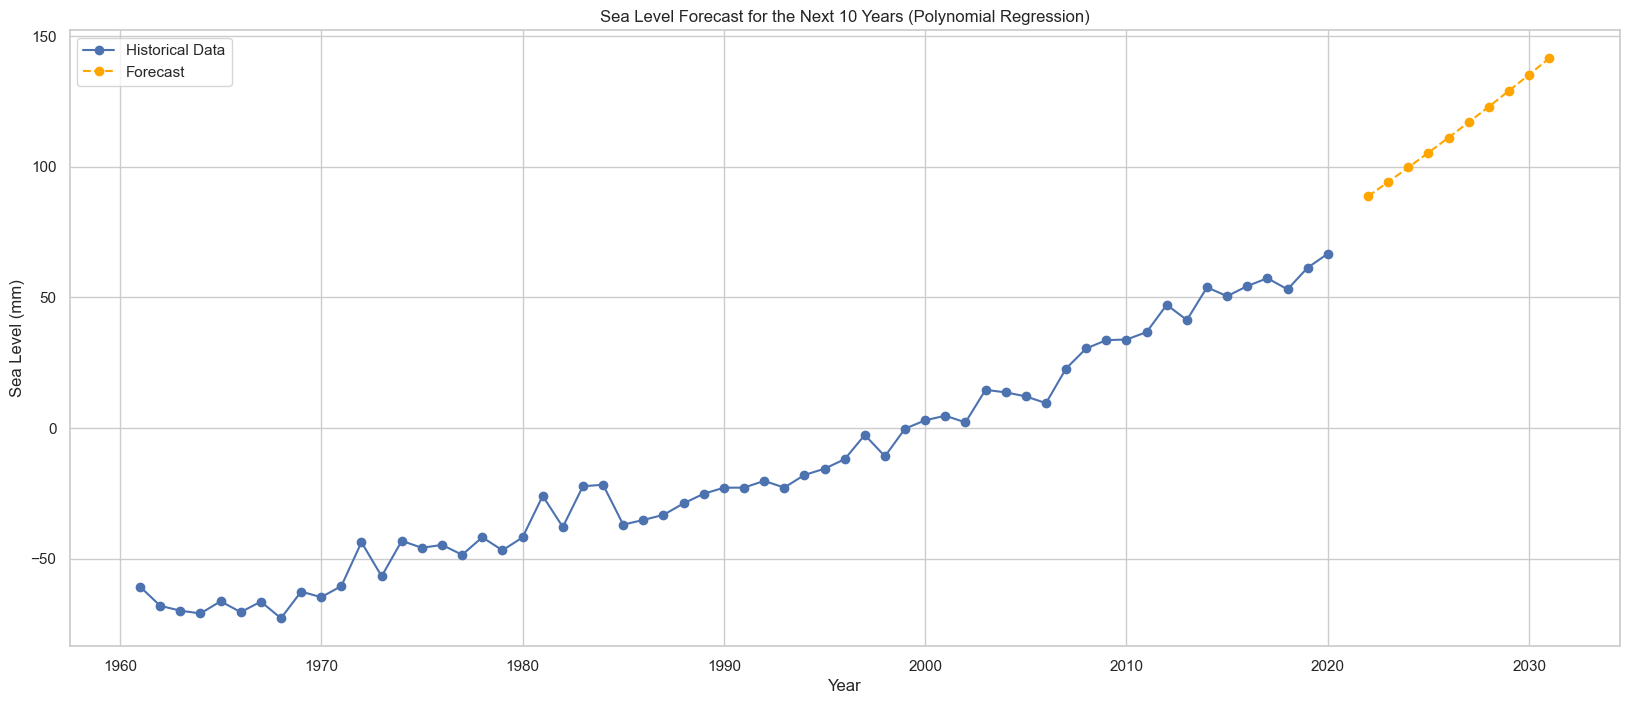

In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the sea levels dataset
sea_levels_df = pd.read_csv('Global_sea_level_rise.csv', skiprows=range(1, 82))

# Ensure 'year' is in datetime format
sea_levels_df['year'] = pd.to_datetime(sea_levels_df['year'], format='%Y')

# Aggregate or average duplicate entries for each year
sea_levels_agg = sea_levels_df.groupby('year')['mmfrom1993-2008average'].mean().reset_index()

# Polynomial regression
degree = 2  # Adjust the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(sea_levels_agg['year'].values.reshape(-1, 1))
model = LinearRegression()
model.fit(X_poly, sea_levels_agg['mmfrom1993-2008average'])

# Forecast the next 10 years
future_years = pd.date_range(start=sea_levels_agg['year'].max(), periods=10 + 1, freq='Y')[1:]
X_future_poly = poly_features.transform(future_years.values.reshape(-1, 1))
sea_levels_forecast = model.predict(X_future_poly)

# Plotting the historical data and the forecast
plt.figure(figsize=(20, 8))
plt.plot(sea_levels_agg['year'], sea_levels_agg['mmfrom1993-2008average'], label='Historical Data', marker='o')
plt.plot(future_years, sea_levels_forecast, label='Forecast', linestyle='--', marker='o', color='orange')
plt.title('Sea Level Forecast for the Next 10 Years (Polynomial Regression)')
plt.xlabel('Year')
plt.ylabel('Sea Level (mm)')
plt.legend()
plt.show()


# Decomposition and Comparisons between the data sets

In [41]:
# Display summary statistics for temperature data
print(df_agg.describe())

# Display summary statistics for sea level data
print(sea_levels_agg.describe())

# Display summary statistics for greenhouse gas emission data
print(total_emissions.describe())

                      Year      Value
count                   60  60.000000
mean   1990-07-02 12:00:00   0.476002
min    1961-01-01 00:00:00  -0.221856
25%    1975-10-01 18:00:00   0.102793
50%    1990-07-02 12:00:00   0.330004
75%    2005-04-02 06:00:00   0.854955
max    2020-01-01 00:00:00   1.500217
std                    NaN   0.480884
                      year  mmfrom1993-2008average
count                   60               60.000000
mean   1990-07-02 12:00:00              -14.317921
min    1961-01-01 00:00:00              -72.814063
25%    1975-10-01 18:00:00              -45.022396
50%    1990-07-02 12:00:00              -22.530729
75%    2005-04-02 06:00:00               13.894271
max    2020-01-01 00:00:00               66.704325
std                    NaN               41.048565
count    5.800000e+01
mean     2.098129e+12
std      9.625616e+11
min      7.638355e+11
25%      1.248948e+12
50%      1.976271e+12
75%      2.840365e+12
max      4.001781e+12
dtype: float64


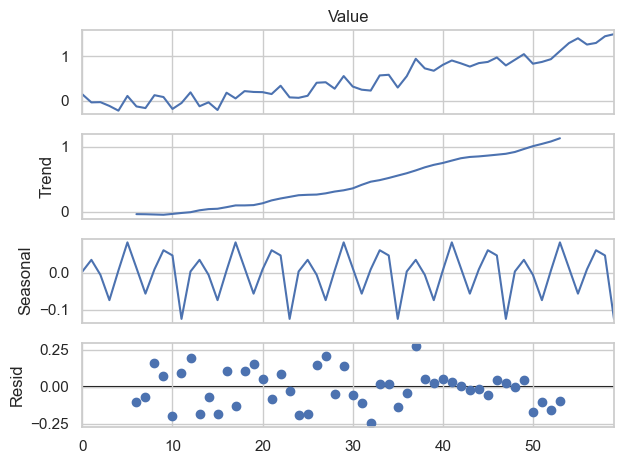

In [42]:
# Seasonal decomposition for global temperature data
from statsmodels.tsa.seasonal import seasonal_decompose

result_temp = seasonal_decompose(df_agg['Value'], model='additive', period=12)
result_temp.plot()
plt.show()


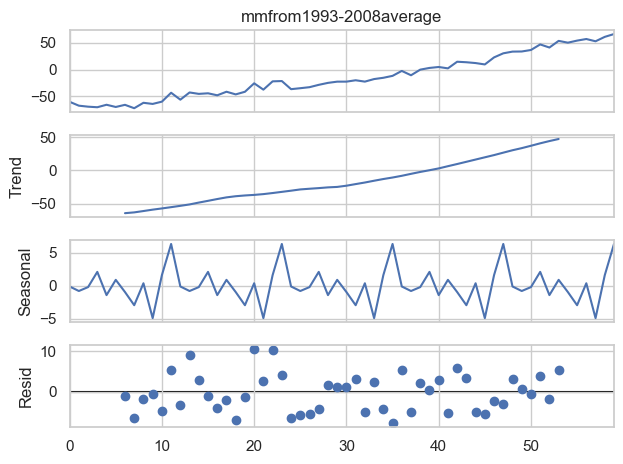

In [43]:
# Seasonal decomposition for sea levels data
result_sea_levels = seasonal_decompose(sea_levels_agg['mmfrom1993-2008average'], model='additive', period=12)
result_sea_levels.plot()
plt.show()


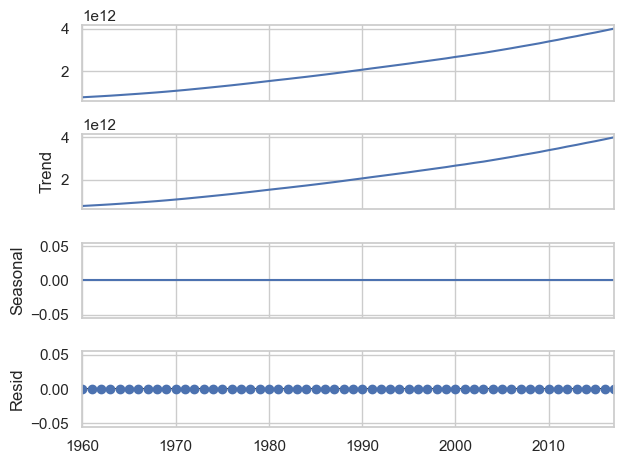

In [44]:
# Seasonal decomposition for greenhouse gas emissions data
result_ghg = seasonal_decompose(total_emissions, model='additive', period=1)  # Adjust the period as needed
result_ghg.plot()
plt.show()

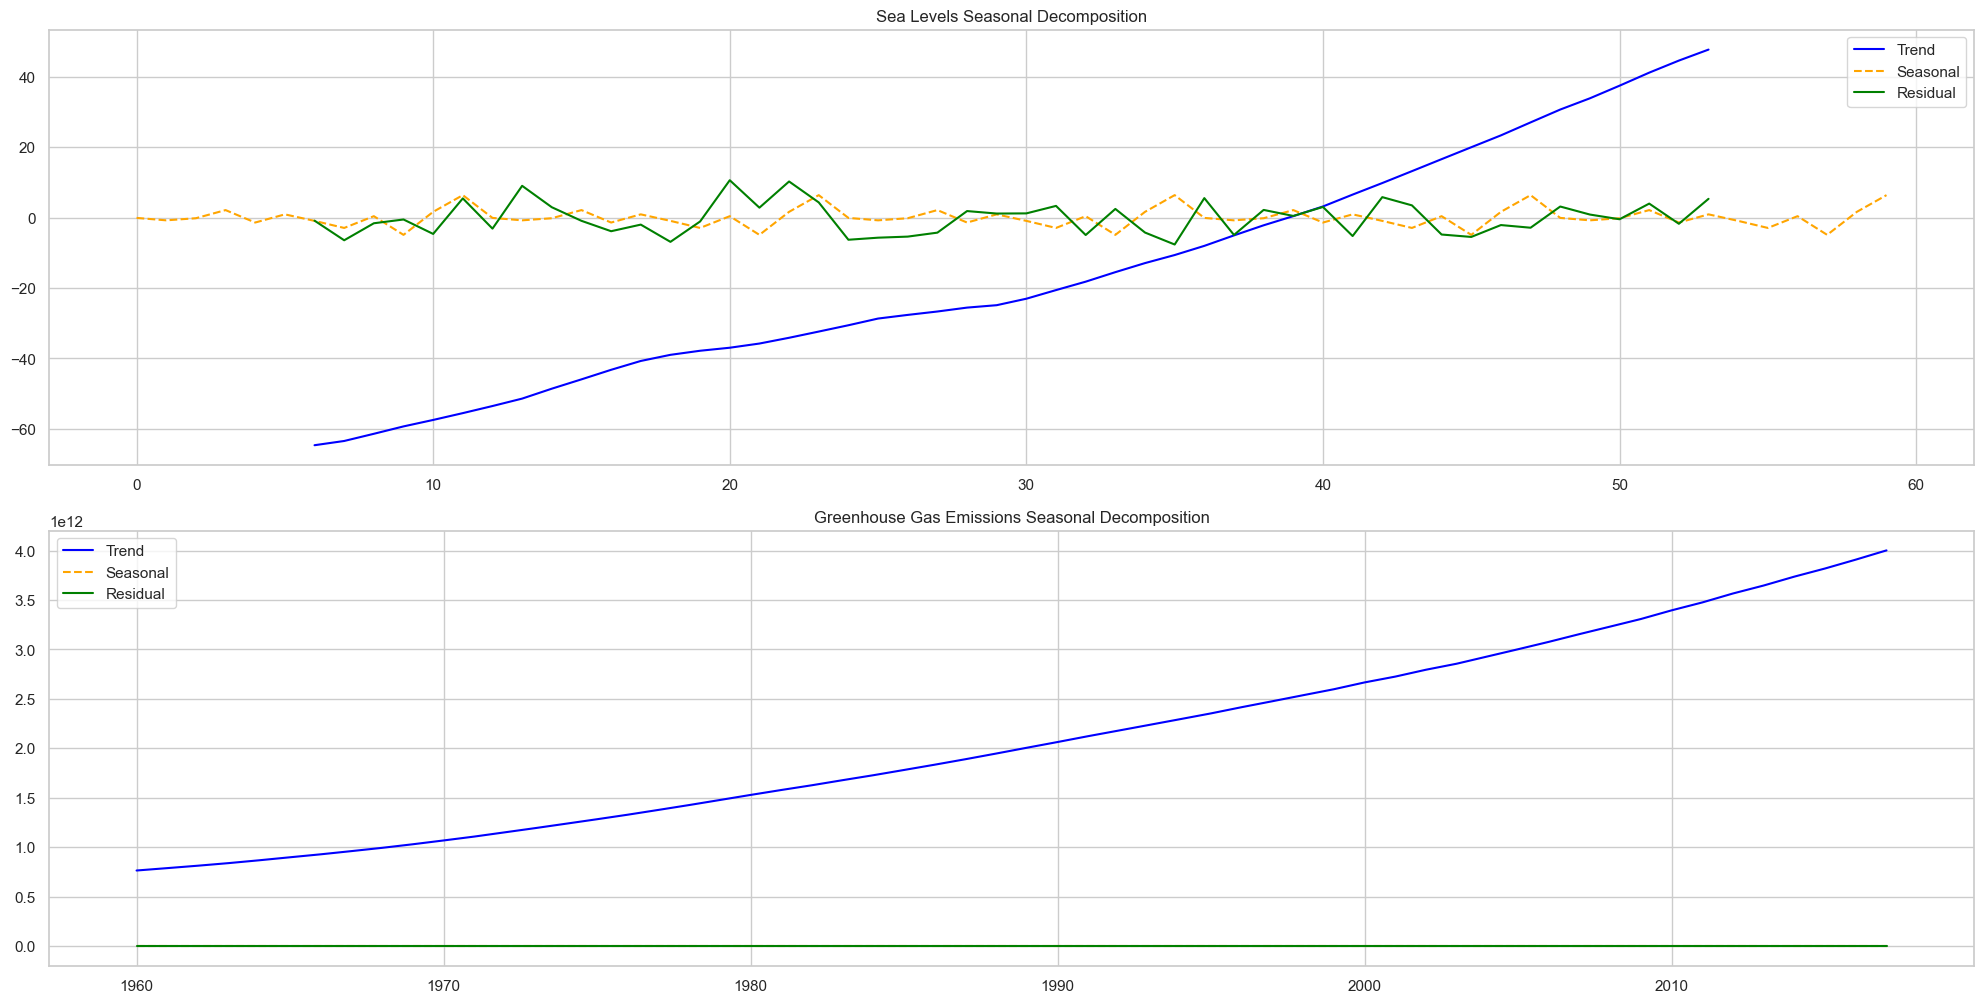

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose global temperature
result_temp = seasonal_decompose(df_agg['Value'], model='additive', period=12)

# Decompose sea levels
result_sea_levels = seasonal_decompose(sea_levels_agg['mmfrom1993-2008average'], model='additive', period=12)

# Decompose greenhouse gas emissions
result_ghg = seasonal_decompose(total_emissions, model='additive', period=1)  # Adjust the period as needed

# Plot the decompositions in subplots
plt.figure(figsize=(20, 15))

# Plot for sea levels
plt.subplot(3, 1, 2)
plt.plot(result_sea_levels.trend, label='Trend', linestyle='-', color='blue')
plt.plot(result_sea_levels.seasonal, label='Seasonal', linestyle='--', color='orange')
plt.plot(result_sea_levels.resid, label='Residual', linestyle='-', color='green')
plt.title('Sea Levels Seasonal Decomposition')
plt.legend()

# Plot for greenhouse gas emissions
plt.subplot(3, 1, 3)
plt.plot(result_ghg.trend, label='Trend', linestyle='-', color='blue')
plt.plot(result_ghg.seasonal, label='Seasonal', linestyle='--', color='orange')
plt.plot(result_ghg.resid, label='Residual', linestyle='-', color='green')
plt.title('Greenhouse Gas Emissions Seasonal Decomposition')
plt.legend()

plt.tight_layout()
plt.show()

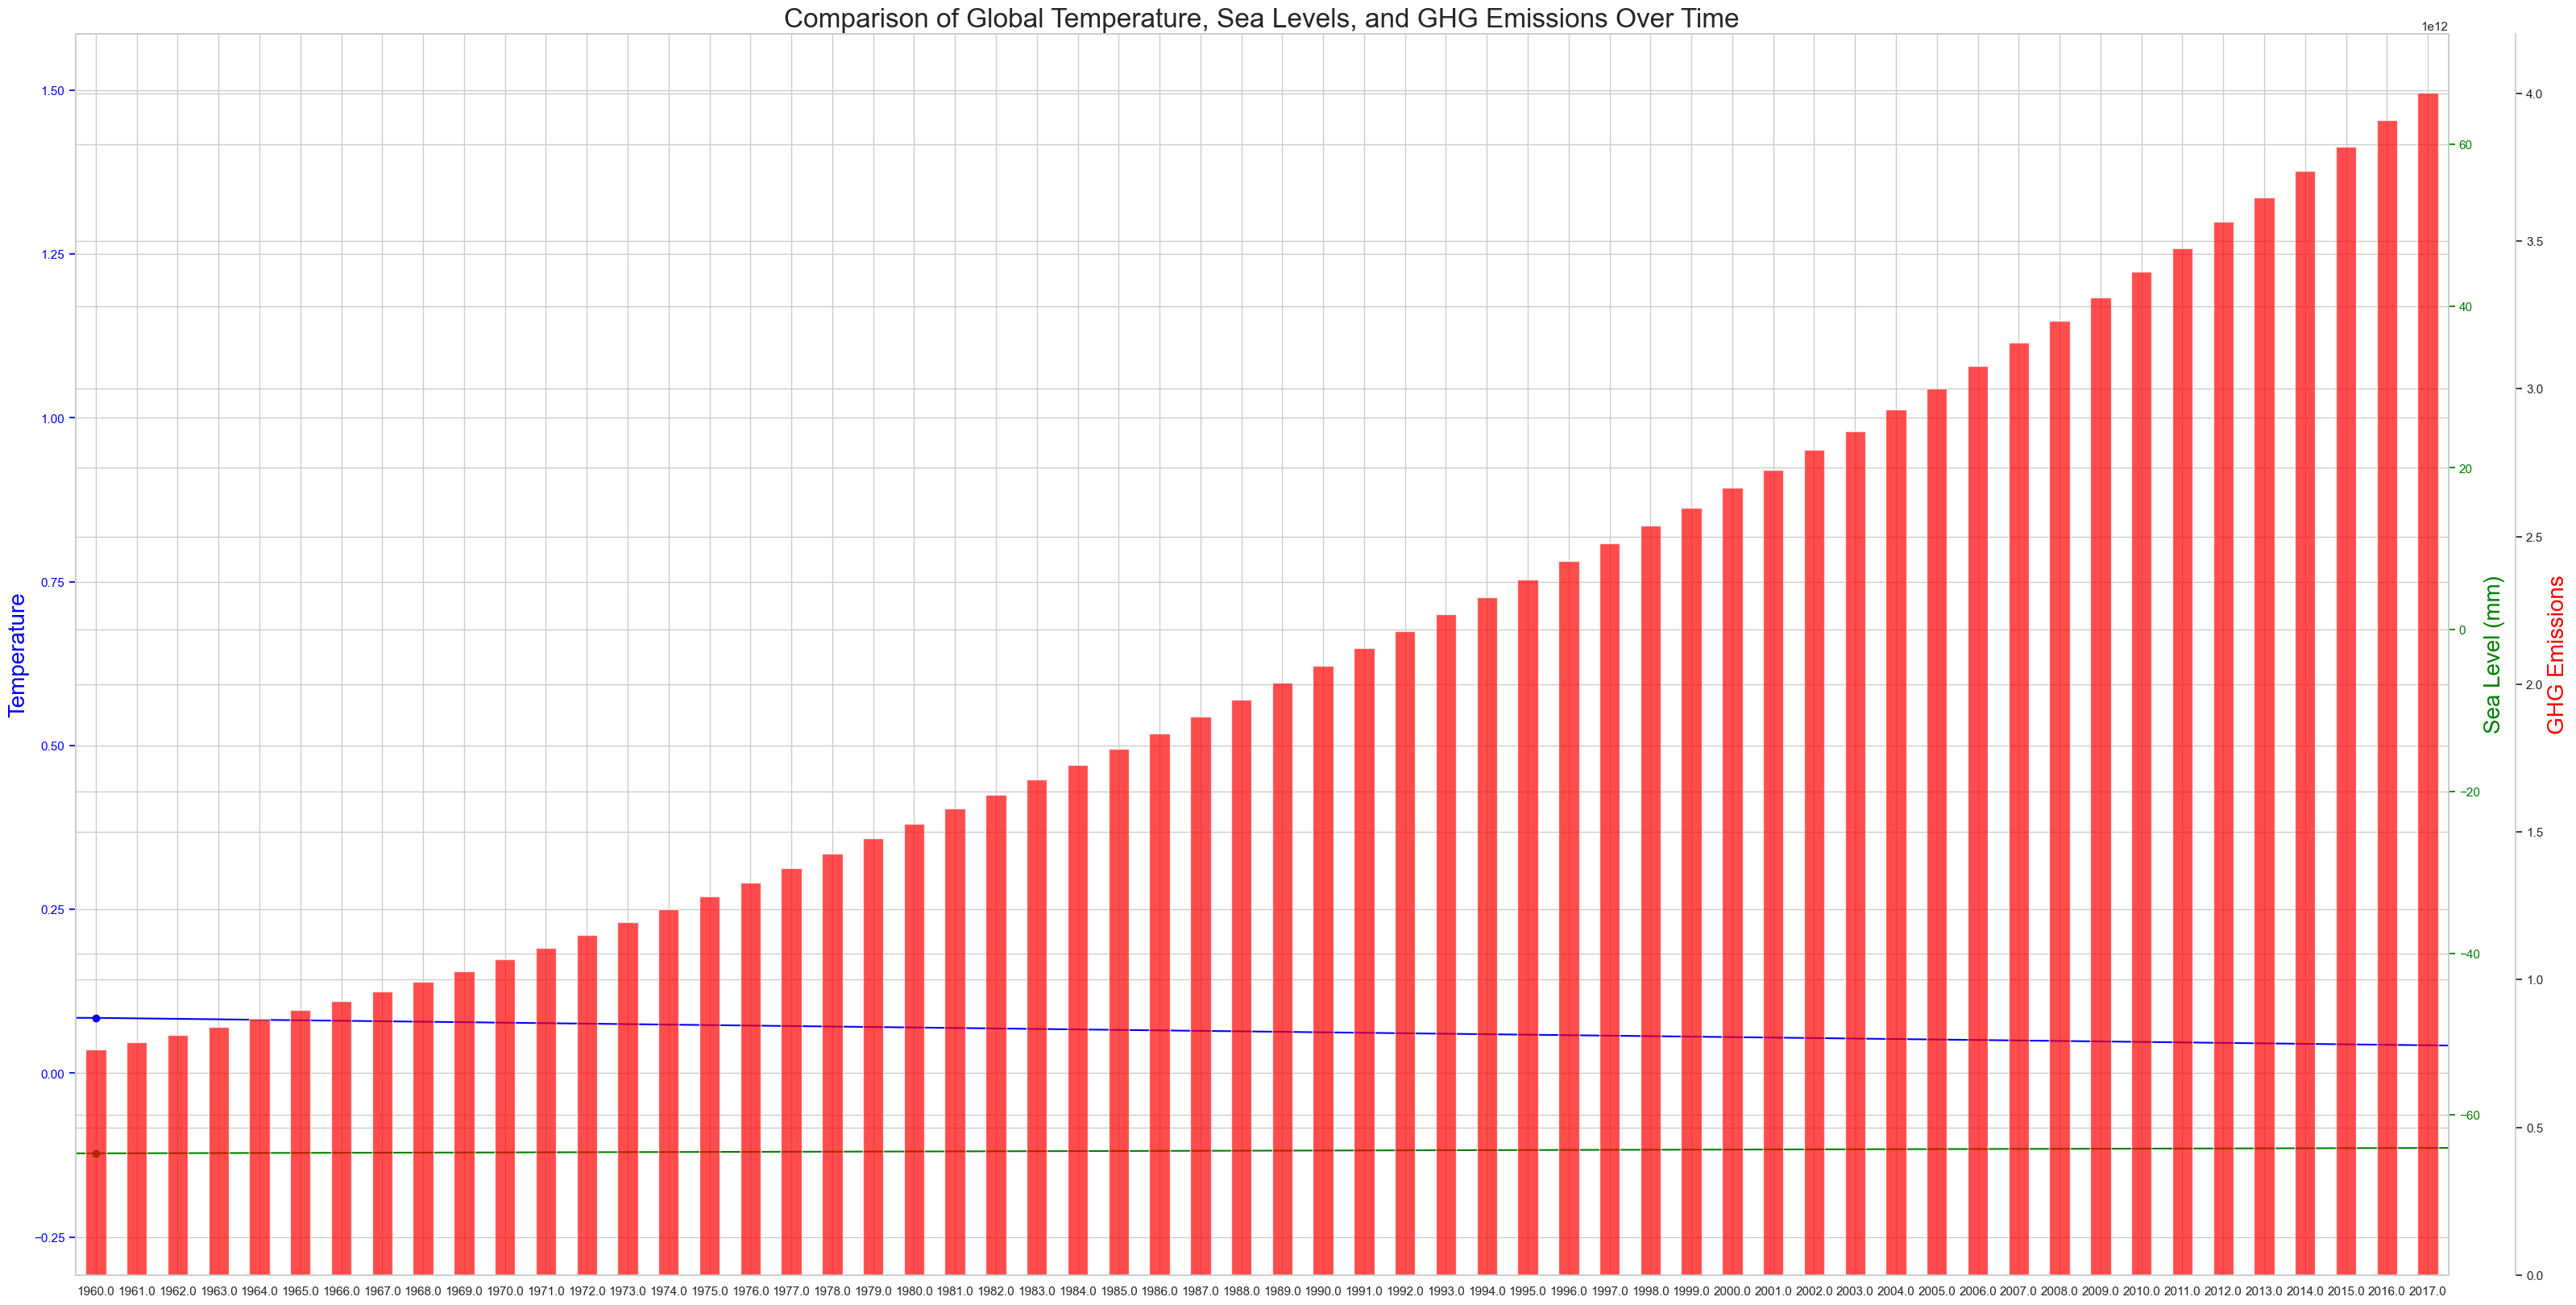

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the main y-axis (left) for Global Temperature
fig, ax1 = plt.subplots(figsize=(38, 20))

# Plot Global Temperature on the first y-axis (left)
ax1.plot(df_agg['Year'], df_agg['Value'], label='Global Temperature', marker='o', linestyle='-', color='blue')
ax1.set_ylabel('Temperature', color='blue', fontsize=20)  # Increase font size
ax1.tick_params('y', colors='blue')

# Create a secondary y-axis (right) for Sea Levels
ax2 = ax1.twinx()
ax2.plot(sea_levels_agg['year'], sea_levels_agg['mmfrom1993-2008average'], label='Sea Levels', marker='o', linestyle='-', color='green')
ax2.set_ylabel('Sea Level (mm)', color='green', fontsize=20)  # Increase font size
ax2.tick_params('y', colors='green')

# Plot Greenhouse Gas Emissions on a bar plot
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Adjust the position of the third axis
total_emissions.plot(kind='bar', color='red', alpha=0.7, ax=ax3)
ax3.set_ylabel('GHG Emissions', color='red', fontsize=20)  # Increase font size

# Add labels and title with increased font size
plt.title('Comparison of Global Temperature, Sea Levels, and GHG Emissions Over Time', fontsize=24)
plt.xlabel('Year', fontsize=20)  # Increase font size

# Display the plot
plt.show()